Andrew Dodd, 3/6/21

## Assignment 2: Overview
### Part 1:
Four search algos:
1. randomized hill climbing
2. simulated annealing
3. a genetic algorithm
4. MIMIC

Three optimization problems:
1. 4 Peaks (GA)
2. K-color problem (MIMIC)
3. Count Ones (SA)

### Part 2:
Use neural net provided by mlrose, solve 
_________

In [39]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from time import time

# https://mlrose.readthedocs.io/en/stable/source/tutorial3.html#neural-networks

## 1. Four search algos and 3 optimization problems:

###  1.1 Four Peaks

In [2]:
fitness = mlrose.FourPeaks(t_pct=0.15)
problem_fit = mlrose.DiscreteOpt(length = 20, fitness_fn=fitness, maximize=True)
n_iters = list(range(1, 50))

In [3]:
ga_fitnesses = []
ga_pop_size = 20
for i in n_iters:
    ave = []
    for j in range(20):
        best_state, best_fitness = mlrose.genetic_alg(problem_fit, pop_size=ga_pop_size, max_iters=i)
        ave.append(best_fitness)
    ga_fitnesses.append(sum(ave)/len(ave))

In [4]:
sa_fitnesses = []
sched = mlrose.GeomDecay(init_temp=1, decay=0.99, min_temp=0.001)
for i in n_iters:
    ave = []
    for j in range(20):
        best_state, best_fitness = mlrose.simulated_annealing(problem_fit, schedule=sched, 
                                                              max_attempts=20, max_iters=i)
        ave.append(best_fitness)
    sa_fitnesses.append(sum(ave)/len(ave))

In [5]:
rhc_fitnesses = []
for i in n_iters:
    ave = []
    for j in range(20):
        best_state, best_fitness = mlrose.random_hill_climb(problem_fit, max_iters = i, restarts=10)
        ave.append(best_fitness)
    rhc_fitnesses.append(sum(ave)/len(ave))

In [13]:
mimic_fitnesses = []
for i in range(1,10):
    ave = []
    for j in range(1):
        best_state, best_fitness = mlrose.mimic(problem_fit, pop_size=200, max_iters = i)
        ave.append(best_fitness)
    mimic_fitnesses.append(sum(ave)/len(ave))
mimic_fitnesses.extend([mimic_fitnesses[-1]]*40)
print(mimic_fitnesses)

[27.0, 29.0, 34.0, 35.0, 36.0, 36.0, 36.0, 35.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0]


[Text(0.5, 0, 'Iteration'), Text(0, 0.5, 'Fitness')]

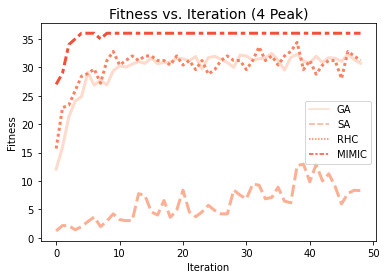

In [210]:
f, ax = plt.subplots(1,1, figsize=(6,4))
d = {'GA': ga_fitnesses,
     'SA': sa_fitnesses,
     'RHC': rhc_fitnesses,
     'MIMIC': mimic_fitnesses}
sns.lineplot(data=pd.DataFrame(d), linewidth=3)
ax.set_title("Fitness vs. Iteration (4 Peak)", fontsize=14)
ax.set(xlabel='Iteration', ylabel='Fitness')

In [183]:
fitness = mlrose.FourPeaks(t_pct=0.2)

ga_times = []
sa_times = []
rhc_times = []
mimic_times = []

def get_time(problem_fit, algo, opt, sz):
    cnt = 0
    best_fitness = 0
    tic = time()
    fn_evals = 0
    while best_fitness < opt:
        if algo == 'ga':
            best_state, best_fitness, curve = mlrose.genetic_alg(problem_fit, max_iters=1000, curve=True)
            fn_evals = len(curve) * 200 * 5
        elif algo == 'mimic':
            best_state, best_fitness, curve = mlrose.mimic(problem_fit, pop_size=50, curve=True)
            fn_evals = len(curve) * 50 * 5
        elif algo == 'rhc':
            best_state, best_fitness, curve = mlrose.random_hill_climb(problem_fit, max_iters = 5000, restarts=30, curve=True)
            fn_evals = len(curve) * sz * 5
        elif algo == 'sa':
            best_state, best_fitness, curve = mlrose.simulated_annealing(problem_fit, schedule=sched, max_iters=5000, curve=True)
            fn_evals = len(curve) * 5
        else:
            print("Failure")
        print(best_fitness)
        cnt += 1
        if time() - tic > 360 and best_fitness < opt:
            return time() - tic, False, sz, fn_evals
    time_taken = time() - tic
    print(best_fitness, time_taken)
    return time_taken, True, sz, fn_evals

# TODO change this to higher number if time allows
l1 = list(range(10,51,5))
print(l1)
for sz in l1:
    opt = sz + np.floor(sz * 0.8)-1
    print("~~~~~ Desired opt: ", opt)
    problem_fit = mlrose.DiscreteOpt(length = sz, fitness_fn=fitness, maximize=True)
    
    if sz < 40:
        ga_times.append(get_time(problem_fit=problem_fit, algo='ga', opt=opt, sz=sz))
    sa_times.append(get_time(problem_fit=problem_fit, algo='sa', opt=opt, sz=sz))
    rhc_times.append(get_time(problem_fit=problem_fit, algo='rhc', opt=opt, sz=sz))
    if sz < 16: 
        mimic_times.append(get_time(problem_fit=problem_fit, algo='mimic', opt=opt, sz=sz))

[10, 15, 20, 25, 30, 35, 40, 45, 50]
~~~~~ Desired opt:  17.0
17.0
17.0 0.2038562297821045
17.0
17.0 0.001834869384765625
17.0
17.0 0.012644052505493164
17.0
17.0 0.38436412811279297
~~~~~ Desired opt:  26.0
26.0
26.0 0.24936389923095703
24.0
15.0
26.0
26.0 0.007819175720214844
26.0
26.0 0.012440919876098633
23.0
8.0
22.0
25.0
21.0
7.0
26.0
26.0 6.769924163818359
~~~~~ Desired opt:  35.0
35.0
35.0 0.23368287086486816
33.0
35.0
35.0 0.005123138427734375
14.0
18.0
10.0
10.0
26.0
11.0
8.0
9.0
25.0
35.0
35.0 0.08448910713195801
~~~~~ Desired opt:  44.0
39.0
44.0
44.0 0.7017929553985596
20.0
25.0
22.0
44.0
44.0 0.027091026306152344
12.0
12.0
9.0
12.0
40.0
8.0
12.0
5.0
9.0
32.0
12.0
17.0
12.0
14.0
10.0
12.0
32.0
35.0
8.0
14.0
9.0
36.0
17.0
7.0
10.0
11.0
10.0
34.0
35.0
11.0
6.0
18.0
12.0
9.0
5.0
11.0
32.0
14.0
9.0
13.0
13.0
12.0
34.0
24.0
12.0
14.0
11.0
32.0
32.0
20.0
11.0
35.0
12.0
12.0
7.0
32.0
38.0
8.0
32.0
8.0
10.0
9.0
8.0
35.0
9.0
13.0
7.0
36.0
11.0
13.0
32.0
8.0
31.0
8.0
12.0
11.0
7.0
1

/Users/andrewpersonal/opt/anaconda3/lib/python3.8/site-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)


22.0
49.0
46.0
23.0
48.0
28.0
47.0
26.0
21.0
18.0
48.0
23.0
21.0
51.0
22.0
26.0
51.0
27.0
21.0
22.0
22.0
25.0
25.0
49.0
19.0
47.0
49.0
24.0
25.0
49.0
53.0
53.0 0.4655578136444092
8.0
10.0
10.0
5.0
17.0
10.0
11.0
10.0
11.0
9.0
6.0
9.0
13.0
8.0
8.0
13.0
7.0
13.0
10.0
10.0
7.0
14.0
7.0
9.0
8.0
7.0
6.0
9.0
13.0
12.0
9.0
8.0
38.0
11.0
38.0
5.0
23.0
7.0
6.0
11.0
14.0
9.0
11.0
9.0
7.0
12.0
6.0
11.0
15.0
12.0
11.0
8.0
6.0
17.0
14.0
9.0
8.0
6.0
9.0
8.0
8.0
11.0
10.0
38.0
7.0
17.0
12.0
10.0
9.0
7.0
12.0
9.0
10.0
12.0
11.0
13.0
9.0
12.0
10.0
7.0
8.0
9.0
8.0
5.0
11.0
6.0
38.0
11.0
9.0
15.0
8.0
14.0
8.0
11.0
10.0
11.0
10.0
12.0
12.0
10.0
8.0
8.0
7.0
9.0
13.0
11.0
8.0
10.0
5.0
41.0
17.0
8.0
14.0
7.0
11.0
9.0
8.0
8.0
11.0
7.0
8.0
13.0
13.0
11.0
8.0
9.0
10.0
8.0
10.0
13.0
11.0
8.0
41.0
10.0
13.0
9.0
9.0
13.0
7.0
12.0
13.0
14.0
8.0
9.0
7.0
8.0
8.0
8.0
7.0
9.0
8.0
8.0
14.0
11.0
11.0
9.0
8.0
22.0
9.0
14.0
14.0
6.0
11.0
9.0
13.0
8.0
8.0
40.0
7.0
9.0
10.0
38.0
12.0
9.0
11.0
7.0
11.0
11.0
13.0
18.0
7.0
8.0


11.0
9.0
9.0
16.0
9.0
16.0
9.0
10.0
8.0
9.0
16.0
10.0
14.0
12.0
10.0
10.0
20.0
7.0
10.0
8.0
11.0
12.0
6.0
4.0
16.0
43.0
7.0
7.0
5.0
9.0
10.0
11.0
8.0
12.0
8.0
11.0
11.0
15.0
5.0
6.0
11.0
10.0
11.0
9.0
13.0
10.0
9.0
8.0
11.0
7.0
11.0
11.0
12.0
11.0
13.0
14.0
13.0
12.0
15.0
10.0
11.0
11.0
6.0
10.0
11.0
14.0
16.0
11.0
5.0
8.0
13.0
10.0
7.0
14.0
11.0
11.0
9.0
9.0
7.0
9.0
10.0
12.0
8.0
9.0
8.0
44.0
11.0
9.0
10.0
41.0
6.0
38.0
39.0
15.0
7.0
11.0
9.0
8.0
9.0
9.0
9.0
11.0
11.0
16.0
8.0
8.0
13.0
14.0
10.0
12.0
7.0
8.0
8.0
39.0
8.0
9.0
7.0
6.0
11.0
8.0
6.0
15.0
37.0
9.0
9.0
10.0
9.0
41.0
10.0
9.0
11.0
9.0
10.0
10.0
8.0
7.0
7.0
8.0
10.0
8.0
8.0
39.0
15.0
43.0
41.0
9.0
8.0
8.0
12.0
14.0
8.0
7.0
5.0
9.0
7.0
8.0
11.0
14.0
11.0
12.0
11.0
11.0
11.0
8.0
8.0
7.0
7.0
7.0
17.0
9.0
10.0
11.0
12.0
12.0
17.0
12.0
11.0
14.0
7.0
11.0
11.0
9.0
8.0
10.0
7.0
11.0
9.0
9.0
10.0
16.0
9.0
8.0
9.0
10.0
10.0
16.0
13.0
8.0
7.0
10.0
8.0
10.0
8.0
13.0
8.0
12.0
7.0
4.0
42.0
10.0
12.0
8.0
9.0
8.0
9.0
9.0
9.0
8.0
8.0
16.0
12

51.0
54.0
54.0
52.0
49.0
49.0
53.0
51.0
49.0
48.0
51.0
55.0
50.0
53.0
46.0
51.0
48.0
49.0
52.0
50.0
52.0
49.0
56.0
52.0
55.0
57.0
55.0
52.0
55.0
55.0
50.0
49.0
57.0
49.0
44.0
52.0
51.0
50.0
49.0
54.0
54.0
53.0
43.0
53.0
52.0
50.0
52.0
52.0
52.0
50.0
52.0
53.0
49.0
49.0
52.0
52.0
53.0
48.0
52.0
48.0
55.0
49.0
50.0
53.0
49.0
48.0
48.0
49.0
52.0
55.0
51.0
48.0
49.0
49.0
54.0
50.0
52.0
53.0
49.0
59.0
50.0
50.0
54.0
55.0
53.0
50.0
49.0
52.0
49.0
53.0
52.0
50.0
51.0
52.0
51.0
52.0
49.0
51.0
48.0
53.0
51.0
51.0
51.0
51.0
57.0
50.0
48.0
51.0
53.0
51.0
47.0
49.0
50.0
49.0
49.0
52.0
53.0
51.0
50.0
49.0
48.0
50.0
52.0
54.0
53.0
51.0
49.0
54.0
49.0
54.0
53.0
53.0
51.0
51.0
52.0
47.0
54.0
51.0
49.0
51.0
48.0
54.0
49.0
54.0
57.0
53.0
49.0
54.0
53.0
45.0
51.0
53.0
50.0
49.0
53.0
53.0
49.0
49.0
52.0
49.0
48.0
49.0
52.0
49.0
48.0
47.0
49.0
46.0
50.0
53.0
50.0
50.0
54.0
53.0
51.0
48.0
52.0
53.0
54.0
50.0
54.0
53.0
49.0
53.0
51.0
52.0
48.0
51.0
54.0
48.0
53.0
49.0
52.0
53.0
57.0
51.0
47.0
51.0
49.0
50.0


8.0
16.0
8.0
9.0
7.0
9.0
13.0
8.0
5.0
8.0
7.0
8.0
7.0
7.0
9.0
10.0
11.0
13.0
10.0
13.0
14.0
7.0
11.0
10.0
11.0
10.0
10.0
7.0
9.0
8.0
9.0
11.0
14.0
10.0
9.0
12.0
8.0
9.0
9.0
6.0
7.0
7.0
7.0
11.0
7.0
7.0
7.0
10.0
6.0
6.0
11.0
15.0
8.0
12.0
8.0
6.0
10.0
10.0
7.0
11.0
12.0
11.0
17.0
8.0
8.0
6.0
9.0
7.0
9.0
8.0
11.0
10.0
9.0
12.0
9.0
12.0
6.0
6.0
13.0
8.0
15.0
5.0
7.0
9.0
10.0
10.0
8.0
9.0
11.0
6.0
8.0
11.0
8.0
9.0
14.0
9.0
14.0
9.0
13.0
7.0
11.0
7.0
7.0
14.0
7.0
9.0
6.0
10.0
5.0
8.0
19.0
8.0
7.0
7.0
7.0
7.0
11.0
7.0
14.0
11.0
7.0
7.0
11.0
11.0
8.0
9.0
11.0
6.0
8.0
45.0
8.0
7.0
8.0
12.0
9.0
10.0
12.0
10.0
9.0
6.0
7.0
7.0
7.0
13.0
10.0
6.0
7.0
5.0
10.0
5.0
9.0
7.0
14.0
9.0
9.0
6.0
16.0
8.0
7.0
9.0
7.0
9.0
13.0
7.0
15.0
7.0
10.0
8.0
10.0
6.0
8.0
12.0
8.0
6.0
50.0
7.0
12.0
11.0
12.0
9.0
10.0
12.0
6.0
10.0
11.0
13.0
8.0
10.0
9.0
8.0
7.0
11.0
9.0
5.0
49.0
15.0
8.0
7.0
14.0
7.0
7.0
8.0
9.0
12.0
9.0
9.0
13.0
7.0
9.0
8.0
9.0
9.0
9.0
11.0
11.0
5.0
16.0
9.0
9.0
8.0
12.0
9.0
14.0
6.0
5.0
10.0
6.0
8.0


7.0
8.0
8.0
11.0
10.0
9.0
12.0
8.0
8.0
10.0
6.0
9.0
6.0
10.0
7.0
9.0
8.0
9.0
6.0
5.0
11.0
6.0
6.0
9.0
8.0
10.0
9.0
7.0
11.0
7.0
10.0
11.0
9.0
7.0
13.0
5.0
8.0
10.0
8.0
10.0
10.0
7.0
6.0
9.0
10.0
6.0
9.0
9.0
10.0
7.0
10.0
12.0
7.0
11.0
5.0
10.0
10.0
11.0
10.0
8.0
7.0
10.0
10.0
10.0
8.0
9.0
9.0
8.0
8.0
8.0
11.0
9.0
12.0
8.0
6.0
11.0
8.0
12.0
12.0
10.0
7.0
10.0
8.0
8.0
10.0
7.0
9.0
8.0
9.0
7.0
12.0
8.0
7.0
11.0
11.0
12.0
8.0
8.0
9.0
4.0
10.0
8.0
6.0
9.0
6.0
10.0
55.0
10.0
9.0
8.0
12.0
8.0
11.0
8.0
8.0
10.0
8.0
8.0
10.0
7.0
12.0
8.0
7.0
7.0
10.0
8.0
7.0
9.0
8.0
9.0
7.0
10.0
10.0
12.0
13.0
8.0
8.0
6.0
9.0
13.0
6.0
15.0
9.0
11.0
8.0
4.0
17.0
7.0
8.0
8.0
14.0
7.0
11.0
7.0
9.0
7.0
11.0
9.0
7.0
11.0
9.0
9.0
8.0
10.0
8.0
4.0
11.0
7.0
8.0
8.0
9.0
8.0
8.0
7.0
8.0
7.0
6.0
7.0
10.0
9.0
9.0
12.0
7.0
9.0
8.0
9.0
9.0
7.0
9.0
7.0
11.0
7.0
7.0
11.0
12.0
12.0
12.0
8.0
6.0
6.0
8.0
6.0
7.0
8.0
9.0
8.0
11.0
9.0
9.0
52.0
14.0
11.0
9.0
8.0
9.0
12.0
20.0
5.0
7.0
7.0
9.0
11.0
6.0
11.0
12.0
12.0
11.0
12.0
15.0
8.

12.0
8.0
7.0
9.0
6.0
6.0
12.0
6.0
9.0
11.0
9.0
10.0
7.0
5.0
9.0
7.0
6.0
6.0
7.0
8.0
10.0
9.0
6.0
6.0
8.0
5.0
8.0
8.0
17.0
6.0
12.0
10.0
7.0
14.0
6.0
11.0
6.0
11.0
7.0
8.0
10.0
8.0
10.0
8.0
5.0
6.0
10.0
8.0
7.0
9.0
6.0
14.0
9.0
9.0
10.0
11.0
7.0
8.0
13.0
14.0
5.0
10.0
10.0
7.0
5.0
11.0
13.0
8.0
8.0
10.0
9.0
7.0
9.0
8.0
16.0
9.0
8.0
10.0
12.0
5.0
11.0
7.0
10.0
5.0
9.0
5.0
11.0
10.0
7.0
7.0
9.0
11.0
8.0
7.0
5.0
15.0
8.0
9.0
7.0
9.0
7.0
14.0
4.0
7.0
8.0
5.0
8.0
12.0
10.0
9.0
6.0
13.0
10.0
7.0
6.0
7.0
10.0
8.0
7.0
7.0
4.0
7.0
7.0
8.0
16.0
10.0
8.0
6.0
8.0
11.0
7.0
9.0
7.0
10.0
7.0
13.0
18.0
10.0
5.0
11.0
6.0
12.0
14.0
18.0
17.0
6.0
8.0
6.0
14.0
12.0
9.0
13.0
11.0
11.0
7.0
11.0
5.0
9.0
11.0
11.0
8.0
10.0
7.0
16.0
10.0
12.0
7.0
9.0
10.0
8.0
11.0
9.0
6.0
16.0
10.0
8.0
12.0
7.0
10.0
8.0
8.0
9.0
11.0
9.0
7.0
9.0
9.0
8.0
6.0
8.0
10.0
7.0
14.0
8.0
19.0
8.0
10.0
7.0
9.0
7.0
12.0
11.0
7.0
8.0
7.0
10.0
9.0
9.0
6.0
7.0
8.0
10.0
12.0
13.0
8.0
7.0
5.0
8.0
9.0
16.0
7.0
6.0
12.0
12.0
9.0
11.0
8.0
7.0
5.0


16.0
9.0
8.0
11.0
7.0
8.0
5.0
9.0
9.0
6.0
7.0
8.0
10.0
9.0
6.0
6.0
9.0
10.0
8.0
9.0
51.0
8.0
19.0
7.0
9.0
14.0
7.0
7.0
6.0
12.0
13.0
7.0
6.0
11.0
5.0
7.0
8.0
12.0
12.0
8.0
13.0
12.0
5.0
7.0
6.0
10.0
10.0
14.0
10.0
8.0
10.0
6.0
12.0
7.0
11.0
7.0
9.0
6.0
6.0
11.0
8.0
13.0
11.0
6.0
9.0
13.0
12.0
12.0
6.0
10.0
7.0
5.0
8.0
8.0
7.0
14.0
6.0
8.0
7.0
9.0
8.0
5.0
5.0
10.0
9.0
10.0
11.0
13.0
10.0
13.0
8.0
6.0
6.0
10.0
9.0
9.0
7.0
10.0
11.0
7.0
6.0
6.0
9.0
8.0
7.0
11.0
13.0
13.0
8.0
11.0
8.0
7.0
14.0
8.0
11.0
6.0
15.0
8.0
8.0
11.0
8.0
7.0
7.0
4.0
11.0
8.0
9.0
7.0
7.0
16.0
10.0
8.0
7.0
9.0
9.0
5.0
9.0
12.0
8.0
13.0
9.0
6.0
13.0
7.0
13.0
9.0
7.0
7.0
15.0
9.0
7.0
54.0
11.0
7.0
7.0
7.0
9.0
7.0
16.0
12.0
9.0
10.0
10.0
12.0
10.0
8.0
7.0
9.0
7.0
9.0
5.0
9.0
13.0
8.0
10.0
8.0
10.0
11.0
10.0
10.0
10.0
9.0
9.0
11.0
17.0
8.0
9.0
11.0
8.0
12.0
5.0
9.0
10.0
11.0
13.0
5.0
7.0
5.0
7.0
7.0
6.0
6.0
9.0
10.0
13.0
7.0
7.0
6.0
7.0
11.0
7.0
13.0
6.0
13.0
5.0
11.0
8.0
7.0
11.0
5.0
13.0
9.0
10.0
5.0
14.0
7.0
12.0
7.0
1

9.0
13.0
9.0
9.0
8.0
7.0
11.0
8.0
6.0
9.0
7.0
10.0
13.0
8.0
9.0
9.0
8.0
12.0
9.0
11.0
9.0
7.0
7.0
8.0
7.0
7.0
7.0
13.0
10.0
9.0
10.0
7.0
7.0
7.0
6.0
9.0
8.0
11.0
12.0
9.0
7.0
6.0
9.0
10.0
7.0
9.0
8.0
13.0
5.0
7.0
7.0
11.0
7.0
8.0
7.0
6.0
7.0
11.0
8.0
7.0
11.0
6.0
6.0
16.0
9.0
10.0
12.0
8.0
6.0
9.0
7.0
7.0
13.0
12.0
10.0
10.0
12.0
8.0
12.0
9.0
10.0
6.0
8.0
8.0
8.0
11.0
13.0
6.0
8.0
13.0
6.0
11.0
9.0
10.0
10.0
11.0
11.0
8.0
10.0
10.0
13.0
12.0
9.0
9.0
7.0
8.0
20.0
10.0
9.0
8.0
9.0
12.0
8.0
8.0
9.0
9.0
6.0
9.0
6.0
9.0
9.0
10.0
6.0
7.0
6.0
8.0
12.0
10.0
9.0
9.0
9.0
8.0
7.0
8.0
10.0
10.0
11.0
10.0
7.0
8.0
8.0
11.0
4.0
9.0
7.0
8.0
5.0
8.0
7.0
10.0
8.0
8.0
11.0
7.0
13.0
15.0
13.0
10.0
10.0
11.0
7.0
6.0
9.0
6.0
8.0
17.0
6.0
8.0
7.0
8.0
8.0
9.0
8.0
7.0
6.0
6.0
11.0
9.0
10.0
15.0
10.0
7.0
14.0
16.0
15.0
16.0
13.0
10.0
7.0
9.0
10.0
9.0
8.0
8.0
9.0
10.0
10.0
6.0
6.0
9.0
10.0
10.0
11.0
7.0
6.0
9.0
15.0
15.0
11.0
12.0
8.0
8.0
8.0
8.0
10.0
9.0
6.0
11.0
9.0
11.0
7.0
10.0
8.0
9.0
5.0
11.0
9.0
12.0
7.0


4.0
11.0
9.0
10.0
11.0
6.0
11.0
12.0
7.0
14.0
16.0
12.0
11.0
8.0
8.0
7.0
7.0
6.0
6.0
8.0
10.0
5.0
9.0
8.0
12.0
10.0
8.0
10.0
8.0
6.0
10.0
6.0
10.0
7.0
7.0
7.0
8.0
8.0
8.0
7.0
11.0
12.0
8.0
11.0
8.0
7.0
8.0
11.0
7.0
9.0
9.0
7.0
8.0
11.0
4.0
9.0
7.0
7.0
9.0
9.0
8.0
4.0
6.0
5.0
9.0
14.0
11.0
6.0
9.0
7.0
8.0
8.0
12.0
8.0
9.0
12.0
6.0
9.0
11.0
5.0
6.0
13.0
11.0
10.0
9.0
11.0
10.0
9.0
11.0
8.0
11.0
7.0
7.0
13.0
8.0
6.0
10.0
6.0
7.0
7.0
8.0
9.0
7.0
10.0
8.0
5.0
5.0
7.0
7.0
9.0
8.0
15.0
16.0
9.0
9.0
6.0
14.0
9.0
7.0
7.0
8.0
7.0
8.0
14.0
15.0
7.0
10.0
7.0
5.0
10.0
11.0
11.0
8.0
7.0
8.0
9.0
6.0
8.0
5.0
8.0
10.0
10.0
17.0
6.0
9.0
9.0
8.0
9.0
11.0
7.0
8.0
10.0
9.0
9.0
10.0
10.0
12.0
10.0
5.0
12.0
6.0
6.0
11.0
10.0
6.0
6.0
11.0
9.0
8.0
12.0
8.0
8.0
11.0
11.0
7.0
7.0
8.0
6.0
9.0
9.0
8.0
7.0
6.0
7.0
8.0
8.0
5.0
6.0
7.0
8.0
8.0
11.0
12.0
12.0
13.0
8.0
8.0
6.0
7.0
7.0
8.0
8.0
8.0
9.0
9.0
11.0
12.0
14.0
12.0
6.0
10.0
10.0
7.0
10.0
12.0
11.0
7.0
8.0
10.0
12.0
13.0
12.0
9.0
7.0
12.0
8.0
8.0
8.0
8.0
9.0
8.

10.0
10.0
11.0
11.0
8.0
6.0
9.0
8.0
12.0
6.0
10.0
7.0
10.0
10.0
10.0
9.0
14.0
15.0
10.0
6.0
14.0
7.0
7.0
10.0
10.0
11.0
8.0
10.0
10.0
8.0
11.0
13.0
12.0
8.0
8.0
5.0
7.0
9.0
10.0
8.0
16.0
9.0
12.0
5.0
11.0
7.0
5.0
6.0
7.0
8.0
9.0
7.0
10.0
11.0
6.0
7.0
9.0
11.0
12.0
9.0
9.0
6.0
8.0
13.0
10.0
6.0
9.0
9.0
6.0
11.0
7.0
7.0
8.0
8.0
9.0
7.0
10.0
9.0
7.0
11.0
9.0
7.0
9.0
10.0
8.0
8.0
7.0
8.0
7.0
12.0
6.0
9.0
8.0
9.0
6.0
6.0
10.0
11.0
5.0
6.0
8.0
7.0
8.0
9.0
6.0
9.0
8.0
6.0
8.0
9.0
8.0
10.0
7.0
8.0
10.0
8.0
12.0
5.0
7.0
7.0
6.0
8.0
8.0
8.0
11.0
12.0
11.0
11.0
8.0
6.0
5.0
6.0
8.0
8.0
6.0
9.0
8.0
9.0
12.0
6.0
8.0
9.0
8.0
8.0
9.0
8.0
7.0
7.0
7.0
10.0
10.0
8.0
7.0
15.0
6.0
12.0
7.0
9.0
9.0
6.0
14.0
15.0
19.0
7.0
5.0
9.0
12.0
6.0
10.0
6.0
8.0
10.0
10.0
10.0
7.0
6.0
10.0
9.0
18.0
8.0
9.0
8.0
8.0
8.0
12.0
7.0
8.0
10.0
8.0
9.0
12.0
10.0
9.0
9.0
8.0
9.0
11.0
9.0
9.0
11.0
8.0
7.0
8.0
7.0
8.0
8.0
10.0
50.0
10.0
9.0
7.0
10.0
9.0
8.0
13.0
14.0
10.0
11.0
9.0
9.0
6.0
8.0
8.0
10.0
7.0
8.0
10.0
13.0
9.0
17.0
13

10.0
9.0
9.0
8.0
7.0
8.0
9.0
8.0
14.0
7.0
6.0
10.0
9.0
7.0
5.0
8.0
9.0
9.0
7.0
8.0
6.0
6.0
9.0
8.0
11.0
9.0
6.0
7.0
11.0
8.0
8.0
15.0
8.0
9.0
8.0
8.0
8.0
11.0
7.0
8.0
10.0
11.0
11.0
7.0
11.0
8.0
12.0
11.0
7.0
4.0
6.0
11.0
7.0
5.0
6.0
7.0
8.0
9.0
9.0
9.0
13.0
11.0
6.0
9.0
7.0
9.0
6.0
9.0
7.0
8.0
10.0
12.0
7.0
11.0
7.0
6.0
10.0
8.0
9.0
9.0
8.0
9.0
12.0
11.0
10.0
7.0
12.0
10.0
10.0
12.0
10.0
5.0
7.0
10.0
8.0
8.0
6.0
10.0
7.0
7.0
13.0
9.0
9.0
9.0
9.0
7.0
8.0
7.0
7.0
11.0
6.0
8.0
8.0
7.0
8.0
7.0
9.0
8.0
17.0
9.0
8.0
14.0
6.0
10.0
11.0
10.0
7.0
14.0
12.0
7.0
7.0
8.0
17.0
11.0
10.0
9.0
15.0
10.0
7.0
8.0
8.0
7.0
7.0
18.0
13.0
8.0
8.0
6.0
7.0
12.0
9.0
8.0
10.0
5.0
8.0
13.0
7.0
7.0
8.0
9.0
7.0
8.0
4.0
8.0
8.0
8.0
11.0
12.0
6.0
8.0
11.0
10.0
11.0
8.0
6.0
8.0
11.0
12.0
13.0
12.0
8.0
11.0
12.0
16.0
6.0
7.0
7.0
6.0
8.0
14.0
9.0
7.0
9.0
6.0
10.0
8.0
8.0
10.0
9.0
9.0
8.0
7.0
11.0
11.0
52.0
9.0
10.0
6.0
8.0
6.0
11.0
11.0
7.0
9.0
8.0
7.0
8.0
7.0
8.0
6.0
15.0
6.0
6.0
8.0
5.0
9.0
11.0
8.0
10.0
11.0
10.0
7

6.0
6.0
10.0
8.0
7.0
11.0
9.0
11.0
7.0
9.0
7.0
10.0
8.0
8.0
12.0
14.0
10.0
8.0
7.0
8.0
7.0
7.0
8.0
10.0
10.0
7.0
11.0
13.0
10.0
14.0
8.0
13.0
11.0
13.0
7.0
9.0
9.0
6.0
12.0
6.0
5.0
8.0
12.0
10.0
8.0
12.0
7.0
7.0
5.0
8.0
13.0
15.0
8.0
9.0
8.0
11.0
6.0
6.0
6.0
6.0
10.0
12.0
10.0
14.0
7.0
9.0
10.0
10.0
6.0
8.0
10.0
10.0
9.0
9.0
6.0
12.0
7.0
9.0
7.0
6.0
7.0
18.0
10.0
9.0
6.0
10.0
7.0
10.0
6.0
7.0
7.0
6.0
7.0
12.0
10.0
8.0
7.0
11.0
12.0
9.0
8.0
10.0
10.0
8.0
7.0
6.0
10.0
8.0
16.0
9.0
6.0
9.0
10.0
9.0
7.0
8.0
12.0
9.0
10.0
11.0
9.0
12.0
9.0
9.0
6.0
7.0
8.0
8.0
10.0
7.0
9.0
10.0
6.0
7.0
6.0
15.0
10.0
9.0
7.0
8.0
11.0
8.0
10.0
8.0
14.0
7.0
9.0
10.0
5.0
9.0
10.0
11.0
10.0
10.0
8.0
10.0
10.0
12.0
15.0
8.0
9.0
8.0
12.0
6.0
6.0
10.0
9.0
15.0
7.0
7.0
8.0
10.0
6.0
15.0
10.0
10.0
20.0
13.0
7.0
10.0
7.0
6.0
11.0
8.0
11.0
8.0
9.0
12.0
8.0
10.0
7.0
9.0
6.0
9.0
11.0
7.0
8.0
13.0
8.0
8.0
5.0
8.0
12.0
13.0
8.0
5.0
10.0
8.0
12.0
15.0
8.0
8.0
9.0
7.0
7.0
7.0
8.0
7.0
9.0
7.0
6.0
7.0
9.0
6.0
13.0
9.0
12.0
6.0


10.0
9.0
7.0
10.0
5.0
12.0
9.0
12.0
5.0
7.0
14.0
6.0
9.0
12.0
9.0
7.0
5.0
6.0
6.0
14.0
6.0
9.0
13.0
9.0
10.0
11.0
12.0
9.0
10.0
9.0
4.0
8.0
8.0
9.0
10.0
10.0
8.0
10.0
7.0
12.0
14.0
8.0
10.0
7.0
6.0
9.0
8.0
17.0
6.0
8.0
7.0
13.0
9.0
7.0
13.0
7.0
6.0
8.0
11.0
8.0
6.0
6.0
12.0
11.0
9.0
7.0
6.0
6.0
6.0
7.0
7.0
10.0
8.0
10.0
9.0
7.0
9.0
7.0
11.0
8.0
10.0
7.0
7.0
11.0
9.0
10.0
6.0
6.0
9.0
12.0
9.0
8.0
8.0
6.0
6.0
12.0
6.0
10.0
7.0
8.0
7.0
11.0
7.0
11.0
14.0
13.0
6.0
10.0
9.0
7.0
9.0
9.0
7.0
14.0
5.0
11.0
6.0
11.0
5.0
10.0
7.0
9.0
8.0
7.0
9.0
7.0
14.0
10.0
5.0
6.0
7.0
10.0
9.0
7.0
8.0
11.0
13.0
9.0
8.0
8.0
12.0
7.0
6.0
6.0
9.0
7.0
7.0
9.0
11.0
12.0
8.0
10.0
6.0
14.0
18.0
5.0
9.0
12.0
10.0
9.0
14.0
7.0
6.0
9.0
6.0
7.0
7.0
7.0
7.0
8.0
14.0
9.0
8.0
7.0
14.0
8.0
7.0
10.0
10.0
8.0
15.0
16.0
7.0
8.0
5.0
8.0
10.0
8.0
11.0
12.0
9.0
10.0
10.0
7.0
12.0
7.0
11.0
7.0
7.0
9.0
8.0
6.0
6.0
13.0
9.0
8.0
10.0
9.0
9.0
10.0
6.0
10.0
9.0
13.0
7.0
7.0
9.0
8.0
6.0
7.0
7.0
13.0
8.0
9.0
11.0
6.0
7.0
11.0
6.0
8.0
8.0

13.0
7.0
11.0
7.0
6.0
12.0
9.0
8.0
26.0
6.0
6.0
9.0
9.0
5.0
10.0
12.0
9.0
11.0
13.0
7.0
6.0
10.0
10.0
6.0
13.0
8.0
12.0
10.0
9.0
8.0
13.0
10.0
13.0
8.0
6.0
11.0
15.0
8.0
8.0
9.0
7.0
5.0
7.0
10.0
9.0
8.0
6.0
7.0
10.0
8.0
8.0
10.0
10.0
9.0
10.0
7.0
10.0
6.0
5.0
7.0
8.0
13.0
8.0
6.0
18.0
7.0
9.0
9.0
9.0
6.0
8.0
10.0
12.0
4.0
7.0
9.0
9.0
7.0
12.0
8.0
9.0
8.0
8.0
8.0
7.0
11.0
7.0
7.0
8.0
6.0
10.0
9.0
10.0
8.0
6.0
8.0
8.0
9.0
6.0
9.0
18.0
13.0
7.0
6.0
8.0
10.0
7.0
8.0
7.0
8.0
11.0
8.0
6.0
14.0
6.0
9.0
14.0
11.0
7.0
7.0
6.0
10.0
11.0
9.0
8.0
7.0
7.0
9.0
6.0
9.0
10.0
11.0
8.0
7.0
8.0
9.0
7.0
7.0
5.0
9.0
7.0
11.0
9.0
13.0
11.0
9.0
5.0
8.0
15.0
8.0
8.0
9.0
7.0
15.0
8.0
8.0
7.0
10.0
6.0
7.0
6.0
7.0
10.0
9.0
7.0
10.0
10.0
10.0
11.0
10.0
14.0
7.0
7.0
8.0
6.0
14.0
8.0
8.0
8.0
13.0
7.0
52.0
8.0
14.0
6.0
14.0
7.0
12.0
9.0
11.0
7.0
8.0
9.0
7.0
9.0
7.0
7.0
7.0
5.0
11.0
10.0
5.0
10.0
8.0
7.0
11.0
7.0
8.0
11.0
8.0
10.0
14.0
8.0
9.0
7.0
7.0
8.0
7.0
9.0
8.0
10.0
16.0
10.0
7.0
15.0
10.0
9.0
10.0
6.0
8.0
8.0


7.0
7.0
8.0
7.0
7.0
8.0
7.0
13.0
7.0
5.0
6.0
8.0
6.0
9.0
8.0
9.0
8.0
12.0
13.0
8.0
9.0
10.0
8.0
8.0
8.0
9.0
7.0
6.0
12.0
10.0
8.0
6.0
9.0
10.0
49.0
12.0
7.0
10.0
9.0
5.0
9.0
6.0
11.0
16.0
11.0
9.0
6.0
13.0
9.0
7.0
10.0
13.0
7.0
10.0
7.0
8.0
7.0
11.0
8.0
8.0
8.0
8.0
7.0
16.0
13.0
8.0
11.0
10.0
10.0
8.0
12.0
10.0
19.0
13.0
8.0
9.0
8.0
8.0
10.0
6.0
11.0
8.0
9.0
11.0
7.0
13.0
11.0
6.0
7.0
7.0
12.0
10.0
11.0
6.0
9.0
13.0
8.0
8.0
6.0
9.0
9.0
11.0
11.0
9.0
12.0
5.0
6.0
9.0
6.0
8.0
15.0
7.0
6.0
9.0
9.0
11.0
7.0
11.0
8.0
6.0
10.0
9.0
11.0
9.0
6.0
11.0
7.0
5.0
11.0
6.0
9.0
8.0
12.0
7.0
8.0
8.0
6.0
7.0
17.0
7.0
11.0
7.0
9.0
9.0
5.0
7.0
16.0
8.0
8.0
6.0
5.0
8.0
11.0
11.0
7.0
5.0
8.0
14.0
9.0
13.0
9.0
10.0
10.0
14.0
8.0
7.0
11.0
7.0
9.0
8.0
12.0
49.0
9.0
14.0
13.0
10.0
8.0
7.0
7.0
6.0
6.0
11.0
15.0
10.0
5.0
11.0
9.0
5.0
12.0
7.0
7.0
9.0
9.0
9.0
11.0
8.0
10.0
15.0
11.0
11.0
8.0
7.0
10.0
10.0
11.0
12.0
12.0
12.0
7.0
12.0
6.0
9.0
14.0
10.0
6.0
10.0
12.0
12.0
8.0
6.0
7.0
8.0
9.0
8.0
10.0
8.0
8.0
9.0
11

7.0
6.0
7.0
10.0
7.0
7.0
7.0
9.0
10.0
10.0
7.0
12.0
15.0
9.0
8.0
15.0
9.0
9.0
14.0
12.0
7.0
7.0
10.0
5.0
12.0
8.0
6.0
10.0
6.0
11.0
9.0
6.0
6.0
10.0
10.0
10.0
7.0
9.0
11.0
7.0
7.0
6.0
13.0
7.0
9.0
8.0
12.0
9.0
4.0
7.0
9.0
9.0
8.0
17.0
8.0
6.0
11.0
6.0
11.0
7.0
10.0
9.0
12.0
9.0
7.0
6.0
7.0
11.0
6.0
9.0
8.0
10.0
11.0
9.0
8.0
7.0
8.0
8.0
7.0
6.0
9.0
9.0
7.0
6.0
7.0
10.0
10.0
6.0
7.0
15.0
10.0
9.0
7.0
12.0
7.0
11.0
11.0
9.0
10.0
7.0
10.0
9.0
8.0
13.0
12.0
12.0
7.0
5.0
8.0
10.0
11.0
12.0
10.0
10.0
15.0
17.0
6.0
10.0
17.0
6.0
13.0
8.0
9.0
6.0
12.0
14.0
18.0
9.0
7.0
15.0
10.0
8.0
11.0
8.0
12.0
8.0
5.0
8.0
11.0
9.0
8.0
15.0
9.0
12.0
9.0
14.0
14.0
12.0
9.0
8.0
6.0
5.0
16.0
9.0
12.0
12.0
7.0
7.0
10.0
10.0
7.0
14.0
6.0
13.0
10.0
9.0
10.0
11.0
8.0
6.0
5.0
10.0
8.0
7.0
8.0
9.0
10.0
9.0
10.0
8.0
8.0
9.0
12.0
8.0
12.0
9.0
8.0
13.0
5.0
8.0
12.0
6.0
13.0
5.0
8.0
9.0
12.0
10.0
7.0
9.0
6.0
4.0
9.0
7.0
9.0
6.0
9.0
11.0
9.0
10.0
8.0
9.0
11.0
12.0
10.0
8.0
9.0
8.0
8.0
7.0
13.0
7.0
8.0
10.0
7.0
9.0
8.0
12.0

9.0
9.0
7.0
8.0
10.0
11.0
9.0
5.0
9.0
7.0
10.0
6.0
11.0
13.0
8.0
6.0
9.0
7.0
9.0
22.0
12.0
6.0
10.0
8.0
18.0
7.0
6.0
9.0
8.0
6.0
5.0
7.0
53.0
7.0
12.0
11.0
8.0
8.0
10.0
10.0
13.0
10.0
10.0
14.0
12.0
9.0
8.0
10.0
10.0
5.0
12.0
7.0
6.0
6.0
12.0
9.0
10.0
7.0
13.0
8.0
8.0
9.0
13.0
7.0
11.0
5.0
12.0
6.0
9.0
6.0
7.0
9.0
20.0
8.0
6.0
8.0
10.0
10.0
8.0
9.0
7.0
10.0
7.0
14.0
12.0
11.0
15.0
7.0
5.0
20.0
7.0
11.0
10.0
7.0
14.0
12.0
7.0
13.0
9.0
5.0
8.0
8.0
8.0
9.0
11.0
10.0
11.0
7.0
10.0
10.0
9.0
10.0
9.0
6.0
10.0
8.0
15.0
15.0
8.0
6.0
8.0
9.0
11.0
10.0
11.0
10.0
4.0
7.0
7.0
11.0
6.0
8.0
12.0
12.0
8.0
15.0
16.0
8.0
12.0
11.0
7.0
9.0
12.0
11.0
7.0
9.0
14.0
11.0
7.0
10.0
10.0
9.0
10.0
11.0
9.0
8.0
9.0
9.0
10.0
5.0
16.0
8.0
7.0
6.0
8.0
9.0
7.0
14.0
14.0
7.0
12.0
9.0
10.0
8.0
7.0
10.0
10.0
6.0
9.0
7.0
8.0
11.0
8.0
7.0
7.0
6.0
14.0
10.0
8.0
6.0
9.0
8.0
10.0
6.0
7.0
17.0
8.0
8.0
13.0
8.0
9.0
13.0
6.0
6.0
10.0
9.0
9.0
8.0
8.0
9.0
8.0
10.0
10.0
10.0
6.0
7.0
10.0
9.0
8.0
8.0
8.0
11.0
8.0
13.0
9.0
6.0
6.0


6.0
10.0
8.0
6.0
9.0
7.0
9.0
7.0
12.0
7.0
6.0
7.0
9.0
9.0
7.0
10.0
10.0
6.0
9.0
10.0
10.0
8.0
13.0
8.0
10.0
8.0
7.0
7.0
10.0
11.0
11.0
11.0
11.0
9.0
7.0
8.0
12.0
10.0
10.0
11.0
11.0
9.0
7.0
14.0
12.0
10.0
10.0
8.0
9.0
8.0
8.0
10.0
6.0
8.0
7.0
7.0
9.0
8.0
54.0
10.0
10.0
12.0
8.0
7.0
9.0
6.0
5.0
12.0
9.0
7.0
10.0
4.0
8.0
5.0
8.0
5.0
9.0
8.0
7.0
9.0
16.0
7.0
5.0
7.0
8.0
10.0
9.0
14.0
12.0
7.0
7.0
8.0
9.0
12.0
6.0
12.0
12.0
8.0
7.0
8.0
11.0
8.0
15.0
7.0
11.0
11.0
7.0
7.0
11.0
6.0
11.0
8.0
8.0
11.0
13.0
6.0
12.0
11.0
7.0
6.0
6.0
11.0
9.0
7.0
9.0
10.0
12.0
9.0
8.0
12.0
8.0
10.0
8.0
7.0
14.0
7.0
10.0
8.0
10.0
8.0
9.0
12.0
6.0
8.0
11.0
9.0
5.0
10.0
7.0
7.0
6.0
8.0
13.0
14.0
9.0
10.0
8.0
8.0
9.0
7.0
10.0
9.0
11.0
15.0
9.0
7.0
6.0
9.0
7.0
13.0
5.0
12.0
7.0
8.0
10.0
9.0
9.0
7.0
8.0
6.0
7.0
9.0
13.0
5.0
9.0
9.0
12.0
7.0
8.0
5.0
8.0
6.0
10.0
8.0
7.0
10.0
15.0
8.0
8.0
7.0
5.0
6.0
10.0
6.0
11.0
7.0
11.0
10.0
10.0
7.0
10.0
8.0
10.0
5.0
8.0
7.0
9.0
10.0
6.0
8.0
10.0
7.0
10.0
8.0
5.0
8.0
12.0
9.0
8.0
5.

9.0
6.0
10.0
9.0
6.0
5.0
8.0
9.0
7.0
5.0
9.0
9.0
8.0
8.0
9.0
8.0
7.0
11.0
5.0
10.0
10.0
9.0
9.0
5.0
12.0
8.0
6.0
9.0
7.0
15.0
9.0
7.0
8.0
8.0
10.0
10.0
9.0
8.0
11.0
7.0
7.0
13.0
6.0
7.0
5.0
11.0
6.0
8.0
9.0
13.0
8.0
7.0
11.0
6.0
10.0
6.0
10.0
15.0
7.0
8.0
7.0
5.0
7.0
9.0
14.0
11.0
6.0
10.0
16.0
7.0
6.0
11.0
7.0
11.0
9.0
14.0
8.0
6.0
11.0
9.0
15.0
7.0
7.0
10.0
14.0
10.0
16.0
8.0
9.0
8.0
9.0
7.0
9.0
8.0
9.0
7.0
9.0
11.0
14.0
7.0
5.0
8.0
11.0
8.0
11.0
8.0
12.0
8.0
8.0
5.0
6.0
9.0
11.0
7.0
7.0
7.0
9.0
9.0
10.0
8.0
11.0
11.0
9.0
7.0
15.0
12.0
8.0
8.0
7.0
7.0
7.0
13.0
12.0
6.0
11.0
6.0
10.0
6.0
7.0
11.0
10.0
7.0
13.0
9.0
8.0
10.0
8.0
13.0
8.0
8.0
6.0
8.0
10.0
6.0
12.0
12.0
9.0
8.0
7.0
10.0
21.0
10.0
17.0
12.0
7.0
6.0
8.0
13.0
6.0
8.0
8.0
12.0
10.0
9.0
8.0
10.0
6.0
9.0
6.0
6.0
8.0
11.0
8.0
10.0
7.0
12.0
9.0
7.0
9.0
12.0
7.0
8.0
13.0
7.0
6.0
8.0
11.0
7.0
8.0
7.0
5.0
8.0
8.0
8.0
10.0
6.0
10.0
9.0
7.0
8.0
9.0
10.0
12.0
7.0
9.0
8.0
8.0
10.0
11.0
11.0
9.0
10.0
8.0
9.0
10.0
10.0
9.0
14.0
9.0
10.0
6

12.0
17.0
11.0
8.0
6.0
8.0
10.0
6.0
6.0
6.0
8.0
7.0
11.0
7.0
7.0
11.0
9.0
10.0
7.0
8.0
9.0
9.0
11.0
7.0
5.0
11.0
7.0
11.0
7.0
10.0
9.0
8.0
11.0
7.0
7.0
6.0
10.0
8.0
11.0
10.0
9.0
8.0
8.0
9.0
8.0
9.0
15.0
10.0
10.0
6.0
8.0
7.0
7.0
14.0
7.0
13.0
10.0
6.0
9.0
9.0
7.0
7.0
5.0
7.0
7.0
6.0
10.0
10.0
8.0
11.0
7.0
9.0
8.0
6.0
9.0
9.0
8.0
8.0
9.0
7.0
7.0
14.0
8.0
10.0
12.0
9.0
7.0
8.0
11.0
10.0
14.0
12.0
14.0
10.0
6.0
10.0
8.0
7.0
6.0
8.0
8.0
11.0
17.0
8.0
9.0
9.0
11.0
9.0
8.0
8.0
9.0
9.0
6.0
8.0
10.0
12.0
8.0
7.0
9.0
13.0
13.0
9.0
8.0
7.0
12.0
7.0
7.0
9.0
8.0
8.0
8.0
8.0
10.0
8.0
11.0
10.0
8.0
17.0
6.0
13.0
9.0
6.0
6.0
9.0
14.0
10.0
6.0
9.0
10.0
9.0
11.0
8.0
9.0
11.0
8.0
7.0
13.0
10.0
7.0
8.0
6.0
8.0
7.0
11.0
8.0
7.0
6.0
11.0
6.0
11.0
7.0
10.0
14.0
6.0
6.0
10.0
7.0
7.0
14.0
12.0
8.0
6.0
7.0
8.0
7.0
7.0
11.0
12.0
10.0
5.0
7.0
10.0
11.0
7.0
8.0
6.0
12.0
8.0
7.0
8.0
12.0
9.0
9.0
10.0
7.0
9.0
10.0
8.0
7.0
9.0
7.0
9.0
9.0
8.0
7.0
9.0
8.0
9.0
9.0
8.0
17.0
11.0
6.0
11.0
9.0
6.0
11.0
7.0
7.0
7.0
11.0


7.0
8.0
7.0
8.0
9.0
9.0
7.0
12.0
10.0
9.0
8.0
6.0
5.0
12.0
9.0
10.0
8.0
8.0
11.0
10.0
7.0
10.0
9.0
9.0
11.0
9.0
11.0
9.0
6.0
7.0
7.0
10.0
8.0
6.0
9.0
7.0
13.0
9.0
6.0
8.0
8.0
6.0
11.0
11.0
11.0
9.0
12.0
8.0
7.0
10.0
14.0
10.0
8.0
10.0
12.0
12.0
8.0
5.0
7.0
8.0
5.0
7.0
13.0
14.0
10.0
16.0
7.0
6.0
6.0
9.0
9.0
8.0
8.0
16.0
8.0
9.0
9.0
10.0
9.0
9.0
10.0
6.0
6.0
5.0
8.0
8.0
11.0
8.0
12.0
8.0
10.0
8.0
6.0
7.0
8.0
7.0
10.0
15.0
12.0
12.0
7.0
6.0
7.0
10.0
7.0
18.0
12.0
10.0
12.0
6.0
8.0
7.0
6.0
9.0
12.0
6.0
13.0
13.0
11.0
8.0
9.0
6.0
9.0
8.0
8.0
8.0
12.0
10.0
7.0
7.0
8.0
12.0
5.0
10.0
13.0
6.0
6.0
10.0
8.0
11.0
7.0
12.0
8.0
9.0
6.0
10.0
9.0
7.0
7.0
6.0
10.0
12.0
9.0
11.0
10.0
6.0
10.0
11.0
11.0
10.0
6.0
10.0
6.0
8.0
5.0
13.0
9.0
13.0
6.0
10.0
12.0
8.0
13.0
6.0
7.0
8.0
8.0
9.0
9.0
6.0
9.0
10.0
8.0
14.0
8.0
8.0
9.0
8.0
8.0
10.0
14.0
10.0
12.0
8.0
8.0
10.0
9.0
10.0
7.0
10.0
9.0
8.0
9.0
11.0
6.0
9.0
11.0
10.0
8.0
7.0
9.0
15.0
9.0
7.0
6.0
9.0
8.0
9.0
8.0
7.0
8.0
9.0
11.0
12.0
6.0
11.0
8.0
11.0
8.0


8.0
6.0
9.0
10.0
8.0
6.0
7.0
7.0
10.0
10.0
7.0
15.0
7.0
10.0
10.0
9.0
7.0
9.0
7.0
15.0
9.0
10.0
9.0
9.0
11.0
8.0
6.0
8.0
9.0
12.0
13.0
11.0
12.0
8.0
9.0
10.0
16.0
10.0
11.0
7.0
8.0
10.0
9.0
8.0
8.0
9.0
10.0
7.0
10.0
12.0
10.0
8.0
7.0
9.0
5.0
7.0
10.0
10.0
12.0
11.0
7.0
13.0
5.0
9.0
9.0
8.0
6.0
7.0
9.0
6.0
9.0
8.0
9.0
8.0
8.0
6.0
9.0
10.0
15.0
6.0
6.0
8.0
7.0
10.0
6.0
7.0
10.0
11.0
7.0
9.0
9.0
7.0
8.0
8.0
12.0
11.0
6.0
11.0
16.0
15.0
7.0
8.0
7.0
11.0
10.0
8.0
12.0
5.0
8.0
11.0
12.0
8.0
9.0
9.0
6.0
9.0
9.0
8.0
7.0
6.0
11.0
8.0
9.0
8.0
11.0
8.0
10.0
12.0
11.0
9.0
9.0
8.0
8.0
15.0
10.0
7.0
10.0
7.0
14.0
6.0
11.0
7.0
6.0
9.0
6.0
6.0
7.0
8.0
5.0
10.0
13.0
7.0
6.0
7.0
4.0
7.0
10.0
10.0
7.0
7.0
11.0
9.0
7.0
7.0
16.0
6.0
9.0
10.0
5.0
7.0
7.0
10.0
7.0
6.0
7.0
17.0
11.0
12.0
9.0
10.0
7.0
7.0
12.0
8.0
16.0
10.0
8.0
11.0
11.0
7.0
9.0
6.0
10.0
9.0
7.0
8.0
9.0
11.0
7.0
12.0
8.0
10.0
13.0
11.0
8.0
11.0
11.0
8.0
18.0
10.0
7.0
9.0
8.0
8.0
18.0
10.0
7.0
13.0
9.0
11.0
7.0
9.0
7.0
6.0
8.0
9.0
49.0
4.0
7.0


51.0
12.0
6.0
13.0
10.0
9.0
9.0
6.0
7.0
14.0
15.0
10.0
7.0
18.0
13.0
9.0
6.0
9.0
5.0
9.0
9.0
4.0
11.0
10.0
10.0
10.0
13.0
11.0
6.0
4.0
10.0
7.0
9.0
9.0
10.0
8.0
10.0
9.0
12.0
8.0
8.0
9.0
9.0
7.0
8.0
7.0
12.0
15.0
14.0
11.0
11.0
8.0
10.0
8.0
10.0
6.0
10.0
28.0
7.0
10.0
10.0
16.0
10.0
12.0
7.0
9.0
8.0
6.0
13.0
12.0
11.0
11.0
8.0
11.0
9.0
7.0
7.0
6.0
10.0
11.0
15.0
9.0
10.0
10.0
7.0
10.0
16.0
13.0
8.0
9.0
10.0
9.0
9.0
10.0
7.0
14.0
8.0
11.0
11.0
9.0
9.0
8.0
13.0
9.0
14.0
8.0
9.0
6.0
10.0
10.0
12.0
13.0
6.0
6.0
7.0
8.0
12.0
8.0
7.0
7.0
8.0
8.0
8.0
12.0
7.0
9.0
10.0
5.0
11.0
6.0
6.0
9.0
7.0
7.0
9.0
10.0
12.0
14.0
11.0
7.0
9.0
5.0
7.0
8.0
7.0
12.0
12.0
5.0
12.0
8.0
5.0
7.0
11.0
11.0
9.0
6.0
9.0
8.0
7.0
7.0
11.0
6.0
7.0
17.0
7.0
10.0
8.0
7.0
5.0
9.0
8.0
8.0
7.0
4.0
15.0
8.0
9.0
11.0
10.0
8.0
6.0
7.0
7.0
11.0
18.0
13.0
9.0
9.0
9.0
8.0
7.0
8.0
8.0
13.0
13.0
10.0
12.0
8.0
9.0
8.0
19.0
7.0
8.0
9.0
7.0
8.0
9.0
7.0
4.0
12.0
19.0
7.0
9.0
6.0
14.0
9.0
7.0
10.0
9.0
7.0
15.0
12.0
14.0
7.0
9.0
7.0
7.0
7

13.0
9.0
11.0
10.0
10.0
9.0
6.0
7.0
10.0
10.0
4.0
8.0
8.0
6.0
9.0
6.0
7.0
11.0
8.0
3.0
6.0
14.0
12.0
10.0
10.0
15.0
8.0
7.0
10.0
10.0
9.0
5.0
10.0
12.0
8.0
10.0
16.0
10.0
10.0
8.0
6.0
6.0
8.0
12.0
16.0
9.0
8.0
7.0
11.0
10.0
12.0
6.0
11.0
8.0
15.0
11.0
11.0
6.0
7.0
11.0
9.0
9.0
16.0
9.0
6.0
8.0
10.0
10.0
7.0
9.0
7.0
7.0
7.0
7.0
7.0
9.0
11.0
6.0
9.0
5.0
9.0
10.0
7.0
6.0
7.0
10.0
10.0
10.0
13.0
9.0
9.0
7.0
7.0
7.0
7.0
8.0
9.0
11.0
8.0
7.0
11.0
7.0
7.0
13.0
9.0
13.0
9.0
9.0
9.0
6.0
8.0
5.0
7.0
8.0
10.0
10.0
8.0
14.0
10.0
8.0
8.0
4.0
9.0
10.0
10.0
10.0
13.0
7.0
10.0
8.0
6.0
5.0
8.0
9.0
6.0
6.0
11.0
7.0
11.0
12.0
13.0
6.0
9.0
8.0
11.0
9.0
7.0
6.0
10.0
6.0
8.0
8.0
9.0
10.0
7.0
9.0
12.0
5.0
5.0
9.0
11.0
10.0
17.0
8.0
10.0
8.0
15.0
6.0
8.0
6.0
7.0
10.0
8.0
7.0
9.0
7.0
8.0
11.0
8.0
8.0
6.0
7.0
12.0
8.0
9.0
7.0
23.0
8.0
9.0
8.0
10.0
12.0
9.0
11.0
14.0
13.0
6.0
17.0
9.0
6.0
9.0
7.0
7.0
9.0
8.0
9.0
6.0
6.0
6.0
8.0
10.0
8.0
7.0
6.0
9.0
9.0
7.0
54.0
11.0
8.0
12.0
6.0
9.0
5.0
8.0
6.0
10.0
7.0
7.0
8.0


7.0
7.0
8.0
10.0
9.0
10.0
15.0
8.0
8.0
8.0
21.0
5.0
8.0
7.0
7.0
14.0
10.0
9.0
8.0
7.0
9.0
13.0
7.0
10.0
7.0
12.0
11.0
8.0
6.0
10.0
8.0
6.0
10.0
9.0
8.0
12.0
6.0
12.0
6.0
9.0
6.0
18.0
7.0
6.0
11.0
12.0
11.0
14.0
9.0
10.0
12.0
8.0
7.0
7.0
7.0
15.0
6.0
8.0
5.0
7.0
6.0
10.0
8.0
13.0
7.0
8.0
14.0
6.0
10.0
13.0
9.0
7.0
17.0
7.0
9.0
11.0
7.0
7.0
6.0
9.0
9.0
12.0
8.0
12.0
7.0
7.0
10.0
9.0
9.0
7.0
9.0
8.0
8.0
9.0
15.0
5.0
6.0
7.0
13.0
8.0
12.0
7.0
12.0
7.0
13.0
8.0
8.0
7.0
7.0
8.0
6.0
6.0
7.0
9.0
7.0
6.0
11.0
11.0
6.0
8.0
13.0
7.0
7.0
5.0
7.0
11.0
7.0
7.0
10.0
7.0
10.0
9.0
7.0
8.0
7.0
12.0
7.0
9.0
9.0
9.0
9.0
10.0
22.0
7.0
8.0
7.0
9.0
9.0
9.0
10.0
11.0
7.0
13.0
13.0
11.0
10.0
7.0
6.0
8.0
12.0
7.0
7.0
8.0
6.0
8.0
10.0
6.0
9.0
10.0
12.0
11.0
7.0
12.0
15.0
6.0
58.0
9.0
12.0
10.0
7.0
15.0
7.0
11.0
9.0
11.0
6.0
9.0
11.0
11.0
8.0
7.0
13.0
8.0
5.0
8.0
8.0
11.0
7.0
10.0
7.0
9.0
10.0
12.0
14.0
5.0
8.0
11.0
6.0
8.0
7.0
6.0
16.0
7.0
9.0
9.0
17.0
14.0
7.0
13.0
10.0
12.0
10.0
7.0
15.0
7.0
8.0
8.0
8.0
8.0
8.

7.0
10.0
6.0
7.0
10.0
7.0
9.0
7.0
9.0
7.0
11.0
6.0
8.0
7.0
9.0
6.0
13.0
9.0
12.0
9.0
11.0
15.0
8.0
7.0
14.0
11.0
8.0
10.0
7.0
10.0
10.0
10.0
19.0
10.0
8.0
8.0
10.0
9.0
12.0
9.0
7.0
5.0
11.0
7.0
7.0
14.0
8.0
7.0
8.0
6.0
11.0
8.0
15.0
6.0
7.0
7.0
7.0
8.0
10.0
14.0
9.0
10.0
8.0
7.0
12.0
8.0
9.0
11.0
7.0
7.0
6.0
10.0
7.0
8.0
8.0
7.0
9.0
8.0
6.0
10.0
8.0
6.0
9.0
9.0
10.0
6.0
13.0
8.0
5.0
10.0
5.0
8.0
11.0
8.0
10.0
10.0
7.0
11.0
10.0
6.0
14.0
10.0
10.0
7.0
7.0
8.0
14.0
11.0
6.0
9.0
8.0
7.0
8.0
16.0
8.0
15.0
10.0
9.0
9.0
5.0
9.0
11.0
8.0
10.0
7.0
6.0
13.0
8.0
6.0
9.0
10.0
10.0
16.0
8.0
10.0
6.0
7.0
7.0
8.0
11.0
10.0
11.0
12.0
15.0
6.0
8.0
10.0
13.0
9.0
8.0
9.0
8.0
11.0
9.0
6.0
7.0
6.0
11.0
7.0
7.0
10.0
8.0
8.0
12.0
9.0
10.0
8.0
8.0
7.0
9.0
8.0
7.0
5.0
8.0
6.0
7.0
8.0
7.0
12.0
9.0
27.0
11.0
8.0
9.0
8.0
6.0
23.0
5.0
11.0
10.0
12.0
5.0
8.0
8.0
7.0
9.0
11.0
9.0
10.0
13.0
7.0
10.0
9.0
10.0
12.0
7.0
10.0
14.0
11.0
12.0
5.0
10.0
6.0
7.0
11.0
10.0
10.0
6.0
9.0
10.0
7.0
13.0
13.0
12.0
7.0
6.0
8.0
6.0


6.0
6.0
9.0
5.0
6.0
15.0
8.0
10.0
10.0
11.0
11.0
8.0
7.0
10.0
8.0
6.0
12.0
7.0
9.0
8.0
10.0
17.0
10.0
8.0
12.0
14.0
9.0
8.0
19.0
13.0
18.0
8.0
10.0
12.0
7.0
5.0
6.0
6.0
7.0
6.0
9.0
12.0
7.0
9.0
6.0
7.0
7.0
13.0
9.0
9.0
5.0
9.0
10.0
13.0
7.0
12.0
8.0
5.0
9.0
10.0
8.0
10.0
8.0
7.0
7.0
16.0
6.0
7.0
10.0
7.0
7.0
11.0
9.0
15.0
8.0
9.0
9.0
14.0
11.0
7.0
8.0
10.0
9.0
6.0
10.0
10.0
8.0
11.0
6.0
7.0
12.0
7.0
13.0
7.0
10.0
7.0
6.0
9.0
9.0
8.0
12.0
7.0
12.0
8.0
9.0
8.0
9.0
10.0
6.0
10.0
10.0
10.0
8.0
10.0
9.0
6.0
10.0
9.0
8.0
7.0
7.0
8.0
10.0
7.0
8.0
13.0
7.0
8.0
9.0
13.0
15.0
8.0
9.0
10.0
8.0
7.0
7.0
7.0
7.0
9.0
7.0
8.0
8.0
10.0
10.0
6.0
10.0
8.0
15.0
12.0
13.0
14.0
8.0
8.0
12.0
9.0
10.0
6.0
11.0
10.0
20.0
9.0
6.0
11.0
9.0
6.0
8.0
6.0
11.0
8.0
7.0
8.0
20.0
13.0
6.0
7.0
6.0
6.0
13.0
8.0
8.0
8.0
12.0
8.0
11.0
9.0
8.0
8.0
6.0
10.0
9.0
6.0
7.0
7.0
51.0
10.0
12.0
9.0
6.0
7.0
10.0
9.0
10.0
11.0
13.0
8.0
7.0
7.0
13.0
14.0
5.0
16.0
12.0
9.0
10.0
10.0
8.0
8.0
7.0
9.0
8.0
9.0
6.0
8.0
7.0
10.0
59.0
11.0
7.

9.0
12.0
19.0
9.0
11.0
8.0
8.0
8.0
9.0
6.0
9.0
8.0
11.0
15.0
7.0
7.0
7.0
12.0
7.0
9.0
9.0
9.0
7.0
19.0
8.0
8.0
16.0
7.0
7.0
7.0
6.0
5.0
11.0
12.0
6.0
13.0
13.0
12.0
8.0
8.0
7.0
11.0
9.0
12.0
10.0
16.0
9.0
8.0
6.0
6.0
10.0
8.0
8.0
8.0
11.0
8.0
12.0
8.0
16.0
12.0
10.0
10.0
10.0
11.0
7.0
8.0
9.0
8.0
7.0
8.0
7.0
6.0
8.0
12.0
7.0
5.0
12.0
10.0
7.0
6.0
14.0
8.0
8.0
9.0
6.0
9.0
9.0
14.0
7.0
10.0
7.0
9.0
8.0
10.0
12.0
8.0
7.0
12.0
7.0
7.0
8.0
7.0
10.0
11.0
8.0
8.0
6.0
9.0
14.0
12.0
8.0
9.0
7.0
8.0
8.0
11.0
10.0
14.0
9.0
11.0
7.0
13.0
6.0
8.0
16.0
9.0
10.0
7.0
8.0
8.0
12.0
7.0
10.0
12.0
5.0
11.0
12.0
6.0
6.0
6.0
8.0
10.0
9.0
7.0
10.0
4.0
9.0
5.0
7.0
10.0
8.0
11.0
10.0
52.0
8.0
12.0
9.0
11.0
7.0
12.0
8.0
12.0
6.0
7.0
5.0
9.0
10.0
7.0
14.0
5.0
8.0
9.0
5.0
7.0
9.0
6.0
6.0
8.0
8.0
8.0
9.0
10.0
7.0
10.0
13.0
8.0
8.0
8.0
7.0
8.0
12.0
12.0
11.0
15.0
8.0
9.0
6.0
7.0
13.0
9.0
7.0
8.0
10.0
5.0
8.0
13.0
8.0
12.0
14.0
7.0
10.0
11.0
9.0
4.0
18.0
10.0
7.0
8.0
14.0
9.0
7.0
11.0
10.0
13.0
7.0
6.0
6.0
6.0
8.0
8

10.0
7.0
12.0
11.0
10.0
9.0
12.0
10.0
8.0
14.0
7.0
8.0
11.0
9.0
10.0
7.0
9.0
8.0
6.0
12.0
7.0
8.0
12.0
7.0
12.0
8.0
9.0
8.0
12.0
8.0
7.0
7.0
4.0
12.0
8.0
8.0
9.0
8.0
10.0
8.0
16.0
11.0
8.0
15.0
10.0
10.0
11.0
17.0
6.0
11.0
7.0
6.0
8.0
8.0
7.0
9.0
11.0
11.0
9.0
7.0
9.0
9.0
5.0
9.0
9.0
6.0
8.0
11.0
7.0
6.0
12.0
9.0
9.0
9.0
9.0
11.0
5.0
16.0
15.0
7.0
8.0
8.0
7.0
11.0
6.0
12.0
7.0
8.0
6.0
7.0
8.0
11.0
6.0
9.0
8.0
10.0
10.0
5.0
12.0
4.0
6.0
10.0
8.0
7.0
14.0
9.0
7.0
10.0
9.0
8.0
8.0
11.0
14.0
8.0
14.0
7.0
9.0
6.0
10.0
6.0
7.0
11.0
11.0
14.0
7.0
5.0
8.0
7.0
11.0
10.0
7.0
9.0
7.0
9.0
6.0
8.0
13.0
7.0
15.0
11.0
6.0
15.0
15.0
9.0
6.0
9.0
8.0
10.0
8.0
8.0
16.0
20.0
10.0
14.0
11.0
7.0
8.0
8.0
10.0
6.0
13.0
8.0
10.0
7.0
8.0
11.0
6.0
14.0
7.0
11.0
8.0
10.0
12.0
8.0
11.0
10.0
12.0
8.0
9.0
14.0
10.0
6.0
8.0
10.0
8.0
5.0
8.0
7.0
12.0
9.0
7.0
5.0
8.0
8.0
6.0
6.0
8.0
10.0
6.0
6.0
11.0
8.0
7.0
7.0
8.0
9.0
8.0
50.0
13.0
9.0
12.0
6.0
9.0
12.0
10.0
9.0
7.0
7.0
7.0
8.0
11.0
7.0
7.0
9.0
9.0
8.0
6.0
8.0
6.0
6.

4.0
10.0
7.0
8.0
5.0
11.0
6.0
8.0
12.0
10.0
8.0
9.0
10.0
11.0
7.0
7.0
5.0
10.0
6.0
7.0
8.0
9.0
7.0
10.0
6.0
6.0
8.0
8.0
8.0
7.0
9.0
8.0
6.0
8.0
13.0
6.0
11.0
10.0
9.0
10.0
8.0
7.0
9.0
8.0
8.0
16.0
6.0
9.0
12.0
8.0
7.0
8.0
8.0
10.0
7.0
7.0
8.0
5.0
10.0
8.0
9.0
9.0
12.0
7.0
6.0
9.0
11.0
6.0
8.0
13.0
14.0
10.0
8.0
6.0
7.0
15.0
19.0
6.0
8.0
14.0
5.0
8.0
9.0
7.0
6.0
7.0
9.0
9.0
7.0
13.0
13.0
9.0
12.0
8.0
8.0
9.0
6.0
14.0
7.0
15.0
7.0
10.0
9.0
6.0
11.0
9.0
10.0
7.0
6.0
9.0
12.0
9.0
11.0
6.0
9.0
13.0
8.0
19.0
6.0
8.0
7.0
9.0
13.0
6.0
10.0
17.0
8.0
11.0
13.0
18.0
5.0
9.0
9.0
9.0
8.0
13.0
10.0
11.0
9.0
8.0
11.0
10.0
7.0
9.0
7.0
8.0
13.0
8.0
6.0
10.0
5.0
11.0
7.0
6.0
20.0
10.0
9.0
5.0
10.0
7.0
7.0
8.0
7.0
17.0
11.0
16.0
9.0
5.0
10.0
9.0
10.0
12.0
9.0
9.0
17.0
18.0
14.0
8.0
10.0
7.0
7.0
6.0
7.0
8.0
10.0
8.0
6.0
8.0
7.0
8.0
11.0
7.0
11.0
6.0
9.0
15.0
10.0
8.0
8.0
7.0
6.0
5.0
7.0
10.0
8.0
11.0
9.0
10.0
9.0
6.0
6.0
6.0
6.0
8.0
6.0
10.0
9.0
10.0
9.0
7.0
9.0
9.0
13.0
8.0
6.0
11.0
14.0
9.0
14.0
10.0
6.

12.0
11.0
9.0
8.0
8.0
12.0
10.0
7.0
6.0
8.0
9.0
10.0
8.0
8.0
9.0
8.0
8.0
6.0
9.0
7.0
11.0
7.0
55.0
12.0
9.0
9.0
9.0
7.0
9.0
6.0
19.0
14.0
7.0
8.0
8.0
12.0
11.0
10.0
6.0
11.0
6.0
8.0
15.0
10.0
7.0
12.0
10.0
11.0
6.0
13.0
6.0
11.0
11.0
14.0
7.0
9.0
11.0
10.0
10.0
10.0
10.0
10.0
17.0
12.0
11.0
12.0
13.0
8.0
8.0
11.0
16.0
9.0
7.0
9.0
12.0
8.0
9.0
15.0
5.0
8.0
5.0
6.0
5.0
10.0
9.0
6.0
11.0
9.0
10.0
10.0
10.0
7.0
8.0
6.0
9.0
10.0
12.0
8.0
11.0
13.0
5.0
6.0
8.0
19.0
14.0
9.0
13.0
8.0
11.0
6.0
10.0
10.0
6.0
13.0
5.0
10.0
6.0
9.0
10.0
9.0
7.0
7.0
7.0
12.0
7.0
16.0
11.0
10.0
6.0
9.0
16.0
8.0
9.0
6.0
7.0
10.0
8.0
7.0
8.0
16.0
9.0
5.0
8.0
51.0
7.0
6.0
13.0
9.0
9.0
8.0
8.0
7.0
9.0
8.0
8.0
8.0
7.0
8.0
7.0
7.0
11.0
51.0
8.0
6.0
8.0
8.0
12.0
8.0
9.0
8.0
5.0
6.0
13.0
7.0
13.0
7.0
7.0
8.0
6.0
8.0
7.0
10.0
7.0
12.0
6.0
14.0
9.0
12.0
7.0
9.0
7.0
8.0
11.0
6.0
11.0
9.0
10.0
8.0
7.0
14.0
9.0
5.0
10.0
6.0
11.0
8.0
10.0
9.0
10.0
10.0
8.0
11.0
9.0
6.0
7.0
12.0
6.0
11.0
7.0
8.0
8.0
8.0
9.0
8.0
9.0
13.0
8.0
9.0
7

10.0
7.0
9.0
7.0
7.0
12.0
10.0
6.0
7.0
10.0
9.0
7.0
10.0
9.0
9.0
7.0
7.0
9.0
10.0
9.0
7.0
11.0
7.0
9.0
6.0
9.0
8.0
6.0
10.0
11.0
12.0
9.0
9.0
9.0
7.0
10.0
8.0
10.0
6.0
11.0
5.0
8.0
10.0
10.0
6.0
8.0
5.0
7.0
8.0
13.0
8.0
8.0
7.0
9.0
8.0
13.0
7.0
13.0
9.0
7.0
6.0
10.0
6.0
13.0
11.0
9.0
18.0
8.0
11.0
10.0
9.0
10.0
5.0
10.0
9.0
12.0
7.0
13.0
8.0
7.0
9.0
11.0
7.0
9.0
11.0
9.0
16.0
16.0
9.0
8.0
9.0
4.0
8.0
7.0
8.0
8.0
7.0
8.0
8.0
6.0
6.0
12.0
5.0
10.0
8.0
8.0
7.0
12.0
7.0
9.0
16.0
10.0
8.0
10.0
7.0
7.0
7.0
8.0
7.0
13.0
13.0
11.0
8.0
15.0
7.0
10.0
7.0
7.0
6.0
7.0
7.0
8.0
9.0
7.0
11.0
7.0
12.0
12.0
8.0
7.0
7.0
5.0
7.0
10.0
8.0
7.0
10.0
11.0
11.0
10.0
5.0
6.0
7.0
7.0
4.0
9.0
6.0
10.0
10.0
8.0
7.0
7.0
8.0
7.0
10.0
6.0
9.0
8.0
10.0
6.0
8.0
6.0
6.0
10.0
11.0
18.0
10.0
6.0
10.0
10.0
9.0
9.0
12.0
6.0
7.0
8.0
55.0
9.0
8.0
7.0
7.0
7.0
7.0
8.0
8.0
8.0
10.0
7.0
7.0
9.0
7.0
9.0
7.0
11.0
6.0
9.0
8.0
9.0
6.0
10.0
9.0
10.0
7.0
12.0
11.0
6.0
12.0
9.0
7.0
11.0
5.0
14.0
9.0
7.0
9.0
4.0
8.0
9.0
8.0
10.0
5.0
12.

7.0
9.0
5.0
8.0
8.0
10.0
9.0
8.0
9.0
8.0
8.0
5.0
7.0
8.0
12.0
7.0
8.0
7.0
6.0
7.0
12.0
6.0
9.0
8.0
9.0
8.0
8.0
10.0
7.0
9.0
12.0
10.0
9.0
8.0
7.0
5.0
10.0
8.0
6.0
10.0
9.0
9.0
9.0
8.0
7.0
8.0
9.0
11.0
11.0
7.0
10.0
9.0
8.0
8.0
14.0
10.0
6.0
8.0
7.0
8.0
11.0
9.0
6.0
13.0
8.0
10.0
9.0
4.0
12.0
14.0
8.0
8.0
10.0
7.0
7.0
6.0
12.0
11.0
7.0
11.0
12.0
7.0
6.0
10.0
12.0
8.0
8.0
11.0
7.0
10.0
5.0
9.0
5.0
7.0
9.0
10.0
6.0
11.0
8.0
10.0
7.0
8.0
6.0
8.0
10.0
8.0
14.0
7.0
12.0
9.0
11.0
9.0
18.0
7.0
5.0
8.0
10.0
9.0
11.0
10.0
7.0
7.0
9.0
7.0
7.0
7.0
6.0
10.0
8.0
5.0
10.0
7.0
7.0
11.0
7.0
12.0
8.0
7.0
10.0
5.0
14.0
9.0
6.0
9.0
14.0
14.0
7.0
9.0
16.0
7.0
9.0
7.0
7.0
7.0
8.0
6.0
6.0
8.0
6.0
8.0
6.0
7.0
9.0
8.0
10.0
8.0
8.0
6.0
8.0
9.0
7.0
10.0
8.0
4.0
7.0
10.0
7.0
21.0
13.0
7.0
10.0
9.0
10.0
14.0
9.0
7.0
13.0
5.0
11.0
7.0
13.0
14.0
9.0
10.0
7.0
5.0
7.0
15.0
8.0
10.0
7.0
10.0
9.0
8.0
6.0
7.0
7.0
7.0
8.0
13.0
9.0
6.0
6.0
5.0
8.0
10.0
8.0
7.0
12.0
8.0
9.0
10.0
10.0
10.0
6.0
10.0
8.0
6.0
9.0
8.0
9.0
10.0
6

9.0
8.0
13.0
6.0
11.0
9.0
10.0
9.0
7.0
7.0
10.0
7.0
9.0
12.0
5.0
9.0
7.0
7.0
14.0
12.0
8.0
13.0
5.0
6.0
7.0
7.0
5.0
10.0
8.0
15.0
7.0
7.0
7.0
9.0
5.0
7.0
8.0
9.0
9.0
7.0
9.0
7.0
13.0
6.0
8.0
6.0
9.0
6.0
9.0
7.0
12.0
10.0
7.0
7.0
9.0
9.0
9.0
21.0
11.0
7.0
9.0
8.0
9.0
8.0
10.0
9.0
7.0
7.0
6.0
5.0
7.0
9.0
8.0
8.0
7.0
8.0
11.0
8.0
8.0
8.0
9.0
9.0
5.0
12.0
13.0
11.0
13.0
8.0
9.0
6.0
16.0
12.0
10.0
9.0
6.0
7.0
7.0
7.0
8.0
5.0
7.0
7.0
5.0
7.0
14.0
9.0
8.0
10.0
6.0
10.0
6.0
6.0
9.0
8.0
9.0
6.0
7.0
7.0
10.0
11.0
9.0
10.0
5.0
7.0
15.0
13.0
10.0
5.0
11.0
7.0
9.0
12.0
8.0
10.0
7.0
11.0
6.0
9.0
11.0
8.0
7.0
7.0
9.0
16.0
8.0
7.0
6.0
5.0
9.0
19.0
12.0
8.0
8.0
11.0
6.0
9.0
8.0
6.0
9.0
7.0
8.0
7.0
6.0
14.0
9.0
7.0
12.0
15.0
7.0
8.0
10.0
9.0
5.0
12.0
9.0
7.0
13.0
6.0
11.0
6.0
7.0
8.0
9.0
8.0
6.0
10.0
15.0
8.0
10.0
8.0
8.0
9.0
12.0
8.0
8.0
9.0
10.0
8.0
9.0
9.0
6.0
8.0
6.0
7.0
12.0
8.0
6.0
7.0
8.0
9.0
9.0
8.0
8.0
8.0
7.0
7.0
6.0
9.0
12.0
8.0
6.0
8.0
14.0
9.0
15.0
8.0
10.0
10.0
7.0
8.0
14.0
5.0
14.0
6.0
9.

7.0
8.0
7.0
7.0
8.0
8.0
7.0
14.0
7.0
9.0
11.0
8.0
10.0
8.0
8.0
7.0
14.0
7.0
12.0
8.0
8.0
11.0
11.0
7.0
8.0
8.0
7.0
11.0
11.0
7.0
9.0
6.0
10.0
8.0
12.0
9.0
8.0
9.0
9.0
7.0
8.0
11.0
8.0
8.0
12.0
8.0
8.0
7.0
10.0
10.0
10.0
12.0
15.0
12.0
10.0
11.0
6.0
8.0
5.0
10.0
12.0
11.0
6.0
17.0
8.0
16.0
7.0
16.0
7.0
6.0
7.0
7.0
8.0
7.0
7.0
16.0
5.0
8.0
9.0
8.0
7.0
7.0
15.0
11.0
15.0
7.0
9.0
11.0
8.0
9.0
11.0
10.0
5.0
8.0
10.0
10.0
6.0
7.0
4.0
5.0
10.0
10.0
8.0
8.0
10.0
8.0
11.0
6.0
11.0
6.0
8.0
8.0
10.0
9.0
8.0
13.0
8.0
12.0
8.0
6.0
8.0
4.0
7.0
7.0
7.0
4.0
10.0
7.0
7.0
5.0
6.0
7.0
16.0
10.0
5.0
9.0
8.0
16.0
8.0
8.0
5.0
13.0
11.0
8.0
8.0
6.0
6.0
11.0
8.0
8.0
14.0
7.0
15.0
8.0
4.0
7.0
8.0
11.0
9.0
8.0
8.0
8.0
6.0
7.0
9.0
10.0
15.0
7.0
9.0
8.0
7.0
10.0
6.0
10.0
8.0
15.0
6.0
12.0
14.0
9.0
10.0
10.0
8.0
10.0
9.0
8.0
6.0
12.0
11.0
8.0
9.0
13.0
7.0
8.0
8.0
7.0
9.0
10.0
10.0
12.0
10.0
6.0
6.0
12.0
6.0
9.0
7.0
8.0
9.0
12.0
8.0
9.0
9.0
12.0
6.0
8.0
6.0
9.0
7.0
9.0
6.0
7.0
14.0
8.0
12.0
6.0
8.0
10.0
11.0
7.0
6.

6.0
6.0
6.0
6.0
11.0
9.0
11.0
5.0
9.0
17.0
5.0
6.0
7.0
14.0
9.0
5.0
15.0
15.0
9.0
8.0
7.0
13.0
7.0
6.0
8.0
10.0
5.0
12.0
7.0
9.0
10.0
10.0
9.0
12.0
9.0
9.0
8.0
6.0
5.0
5.0
11.0
9.0
6.0
8.0
11.0
11.0
7.0
6.0
8.0
7.0
9.0
12.0
8.0
10.0
8.0
8.0
7.0
9.0
11.0
14.0
9.0
4.0
6.0
10.0
9.0
8.0
5.0
9.0
9.0
7.0
10.0
9.0
6.0
8.0
9.0
11.0
11.0
6.0
6.0
8.0
9.0
8.0
8.0
7.0
6.0
7.0
8.0
6.0
7.0
9.0
6.0
7.0
8.0
8.0
10.0
8.0
7.0
8.0
23.0
10.0
11.0
8.0
8.0
7.0
7.0
6.0
10.0
7.0
12.0
9.0
7.0
11.0
12.0
11.0
14.0
9.0
7.0
6.0
15.0
5.0
7.0
12.0
8.0
9.0
11.0
14.0
15.0
8.0
7.0
9.0
9.0
8.0
7.0
9.0
11.0
5.0
7.0
5.0
8.0
5.0
9.0
9.0
5.0
11.0
10.0
11.0
11.0
6.0
8.0
7.0
9.0
7.0
11.0
12.0
7.0
8.0
9.0
6.0
11.0
8.0
12.0
9.0
8.0
9.0
7.0
7.0
9.0
8.0
9.0
9.0
10.0
9.0
6.0
6.0
7.0
5.0
10.0
6.0
8.0
6.0
7.0
10.0
7.0
10.0
7.0
9.0
6.0
9.0
8.0
11.0
10.0
6.0
6.0
11.0
7.0
12.0
7.0
10.0
7.0
5.0
9.0
7.0
6.0
10.0
9.0
8.0
9.0
6.0
7.0
12.0
8.0
8.0
11.0
8.0
7.0
6.0
7.0
9.0
6.0
8.0
5.0
8.0
8.0
7.0
9.0
13.0
5.0
7.0
8.0
13.0
13.0
7.0
8.0
5.0
8.

9.0
11.0
9.0
9.0
9.0
7.0
7.0
9.0
7.0
8.0
11.0
8.0
10.0
7.0
6.0
6.0
5.0
8.0
8.0
8.0
13.0
7.0
12.0
9.0
10.0
9.0
7.0
6.0
12.0
8.0
7.0
9.0
6.0
7.0
8.0
12.0
5.0
7.0
4.0
8.0
6.0
10.0
8.0
9.0
9.0
9.0
6.0
9.0
14.0
13.0
9.0
12.0
10.0
12.0
13.0
7.0
10.0
10.0
9.0
7.0
11.0
7.0
8.0
11.0
13.0
12.0
6.0
5.0
10.0
8.0
8.0
11.0
6.0
9.0
11.0
9.0
9.0
7.0
11.0
29.0
8.0
6.0
12.0
8.0
9.0
7.0
5.0
8.0
16.0
12.0
5.0
6.0
8.0
8.0
9.0
9.0
6.0
13.0
9.0
8.0
9.0
6.0
9.0
7.0
9.0
12.0
8.0
11.0
10.0
10.0
6.0
13.0
9.0
11.0
6.0
6.0
9.0
8.0
7.0
8.0
6.0
9.0
10.0
10.0
6.0
7.0
12.0
8.0
11.0
9.0
12.0
14.0
8.0
10.0
11.0
14.0
7.0
18.0
8.0
6.0
5.0
8.0
9.0
9.0
10.0
9.0
10.0
6.0
8.0
9.0
8.0
9.0
10.0
8.0
7.0
12.0
8.0
7.0
7.0
6.0
7.0
12.0
4.0
7.0
6.0
10.0
11.0
59.0
17.0
7.0
5.0
6.0
8.0
7.0
6.0
8.0
7.0
8.0
6.0
14.0
8.0
6.0
7.0
10.0
10.0
6.0
8.0
4.0
8.0
15.0
7.0
11.0
7.0
7.0
9.0
7.0
10.0
10.0
5.0
4.0
5.0
10.0
7.0
7.0
5.0
3.0
8.0
10.0
10.0
12.0
7.0
6.0
11.0
8.0
8.0
8.0
14.0
7.0
7.0
7.0
8.0
7.0
8.0
13.0
11.0
14.0
13.0
6.0
7.0
15.0
9.0
7.0

8.0
18.0
5.0
7.0
7.0
8.0
8.0
16.0
8.0
11.0
10.0
18.0
9.0
12.0
8.0
10.0
11.0
9.0
12.0
4.0
9.0
10.0
6.0
7.0
6.0
6.0
6.0
16.0
8.0
7.0
6.0
13.0
9.0
8.0
11.0
8.0
8.0
11.0
6.0
7.0
7.0
7.0
11.0
6.0
9.0
10.0
6.0
7.0
8.0
6.0
8.0
11.0
7.0
7.0
14.0
9.0
11.0
11.0
8.0
7.0
6.0
7.0
9.0
9.0
11.0
9.0
6.0
11.0
7.0
8.0
8.0
10.0
6.0
10.0
6.0
8.0
9.0
12.0
7.0
5.0
7.0
10.0
6.0
6.0
9.0
10.0
6.0
9.0
12.0
7.0
7.0
6.0
11.0
6.0
7.0
14.0
12.0
8.0
9.0
7.0
10.0
13.0
8.0
8.0
7.0
9.0
6.0
6.0
8.0
7.0
10.0
6.0
8.0
7.0
7.0
6.0
7.0
6.0
8.0
6.0
6.0
11.0
7.0
10.0
9.0
14.0
7.0
10.0
8.0
9.0
9.0
12.0
8.0
11.0
7.0
14.0
16.0
8.0
8.0
7.0
11.0
8.0
5.0
10.0
5.0
6.0
7.0
8.0
5.0
7.0
10.0
4.0
6.0
13.0
7.0
6.0
8.0
14.0
10.0
6.0
8.0
8.0
9.0
8.0
5.0
7.0
9.0
12.0
7.0
8.0
11.0
6.0
5.0
6.0
11.0
7.0
13.0
8.0
9.0
9.0
7.0
11.0
9.0
6.0
9.0
11.0
14.0
13.0
7.0
10.0
8.0
7.0
6.0
10.0
13.0
16.0
4.0
6.0
9.0
9.0
9.0
8.0
11.0
9.0
8.0
7.0
9.0
12.0
8.0
6.0
7.0
5.0
9.0
6.0
12.0
6.0
8.0
7.0
9.0
7.0
7.0
7.0
10.0
7.0
7.0
7.0
9.0
7.0
8.0
11.0
7.0
6.0
5.0
5.0

8.0
6.0
8.0
13.0
6.0
5.0
7.0
9.0
5.0
7.0
10.0
8.0
11.0
7.0
12.0
7.0
7.0
8.0
8.0
11.0
9.0
5.0
7.0
5.0
8.0
6.0
11.0
9.0
7.0
5.0
8.0
12.0
9.0
7.0
11.0
7.0
11.0
6.0
8.0
7.0
8.0
7.0
11.0
8.0
6.0
9.0
10.0
12.0
10.0
13.0
8.0
9.0
9.0
7.0
7.0
7.0
14.0
7.0
14.0
4.0
5.0
7.0
6.0
8.0
6.0
10.0
9.0
9.0
8.0
8.0
9.0
8.0
10.0
7.0
7.0
8.0
10.0
7.0
5.0
8.0
5.0
11.0
11.0
7.0
10.0
10.0
7.0
7.0
10.0
8.0
12.0
10.0
6.0
7.0
8.0
5.0
9.0
7.0
11.0
9.0
12.0
7.0
7.0
7.0
7.0
6.0
8.0
5.0
10.0
6.0
8.0
7.0
5.0
9.0
10.0
11.0
7.0
9.0
8.0
9.0
7.0
9.0
11.0
8.0
9.0
8.0
8.0
10.0
15.0
10.0
8.0
8.0
10.0
12.0
8.0
8.0
6.0
8.0
7.0
15.0
8.0
5.0
5.0
11.0
9.0
7.0
7.0
6.0
6.0
6.0
7.0
7.0
9.0
8.0
8.0
10.0
9.0
12.0
7.0
9.0
9.0
6.0
8.0
14.0
10.0
7.0
10.0
10.0
13.0
14.0
10.0
7.0
8.0
8.0
10.0
10.0
12.0
7.0
7.0
13.0
13.0
9.0
10.0
7.0
9.0
8.0
9.0
10.0
9.0
9.0
5.0
12.0
9.0
8.0
6.0
9.0
9.0
5.0
8.0
4.0
11.0
15.0
11.0
4.0
9.0
5.0
9.0
6.0
8.0
7.0
9.0
7.0
6.0
10.0
9.0
8.0
7.0
6.0
11.0
6.0
11.0
14.0
6.0
10.0
5.0
9.0
9.0
10.0
12.0
5.0
10.0
10.0
10.0

9.0
6.0
10.0
9.0
8.0
6.0
5.0
11.0
9.0
9.0
10.0
6.0
9.0
10.0
16.0
9.0
7.0
14.0
9.0
12.0
7.0
6.0
8.0
9.0
7.0
12.0
10.0
8.0
8.0
9.0
5.0
8.0
14.0
9.0
8.0
5.0
7.0
13.0
9.0
11.0
7.0
8.0
7.0
7.0
7.0
18.0
9.0
5.0
9.0
11.0
9.0
8.0
8.0
10.0
6.0
11.0
8.0
13.0
10.0
8.0
18.0
11.0
6.0
7.0
7.0
9.0
6.0
7.0
7.0
8.0
12.0
5.0
6.0
5.0
8.0
11.0
10.0
7.0
7.0
9.0
6.0
9.0
7.0
6.0
12.0
10.0
13.0
11.0
8.0
7.0
7.0
9.0
10.0
6.0
8.0
8.0
7.0
14.0
6.0
8.0
9.0
6.0
7.0
9.0
7.0
7.0
12.0
12.0
8.0
10.0
11.0
7.0
7.0
7.0
12.0
6.0
7.0
8.0
7.0
9.0
8.0
10.0
9.0
6.0
5.0
6.0
8.0
9.0
6.0
10.0
5.0
7.0
8.0
12.0
7.0
9.0
13.0
7.0
8.0
9.0
9.0
8.0
6.0
10.0
9.0
8.0
7.0
7.0
6.0
9.0
8.0
8.0
8.0
8.0
10.0
6.0
6.0
9.0
9.0
8.0
12.0
5.0
7.0
8.0
6.0
6.0
6.0
9.0
9.0
8.0
10.0
13.0
8.0
17.0
10.0
8.0
8.0
9.0
8.0
10.0
12.0
7.0
5.0
6.0
10.0
10.0
9.0
8.0
6.0
8.0
8.0
9.0
8.0
7.0
7.0
8.0
11.0
6.0
5.0
11.0
10.0
10.0
8.0
10.0
8.0
12.0
6.0
8.0
10.0
10.0
11.0
9.0
6.0
13.0
9.0
9.0
9.0
6.0
6.0
8.0
13.0
8.0
9.0
13.0
10.0
9.0
7.0
9.0
6.0
16.0
7.0
8.0
10.0
7.0


10.0
7.0
7.0
12.0
7.0
8.0
11.0
13.0
7.0
5.0
6.0
12.0
8.0
9.0
10.0
9.0
9.0
10.0
9.0
8.0
12.0
5.0
10.0
9.0
11.0
8.0
7.0
6.0
11.0
56.0
7.0
8.0
9.0
9.0
8.0
9.0
8.0
10.0
9.0
7.0
9.0
12.0
8.0
9.0
10.0
5.0
9.0
11.0
7.0
14.0
9.0
7.0
6.0
8.0
6.0
12.0
13.0
8.0
7.0
5.0
8.0
6.0
12.0
7.0
7.0
8.0
8.0
11.0
8.0
8.0
9.0
8.0
7.0
8.0
6.0
6.0
6.0
8.0
10.0
9.0
8.0
8.0
7.0
8.0
6.0
12.0
8.0
11.0
7.0
9.0
9.0
6.0
9.0
7.0
10.0
12.0
6.0
11.0
11.0
14.0
7.0
8.0
7.0
9.0
11.0
11.0
15.0
20.0
17.0
10.0
8.0
7.0
7.0
10.0
9.0
7.0
5.0
9.0
7.0
6.0
10.0
8.0
9.0
10.0
9.0
10.0
9.0
15.0
8.0
8.0
9.0
15.0
6.0
6.0
10.0
8.0
8.0
10.0
7.0
9.0
11.0
9.0
8.0
10.0
18.0
8.0
13.0
10.0
8.0
10.0
10.0
8.0
8.0
10.0
9.0
8.0
5.0
16.0
6.0
7.0
12.0
9.0
8.0
7.0
14.0
9.0
10.0
10.0
8.0
8.0
14.0
7.0
11.0
18.0
7.0
9.0
8.0
9.0
9.0
4.0
8.0
6.0
12.0
6.0
7.0
11.0
10.0
12.0
8.0
9.0
8.0
9.0
6.0
8.0
12.0
8.0
6.0
5.0
7.0
7.0
6.0
5.0
10.0
6.0
15.0
17.0
7.0
7.0
10.0
8.0
6.0
7.0
10.0
7.0
9.0
13.0
8.0
11.0
7.0
9.0
6.0
8.0
8.0
7.0
7.0
11.0
12.0
8.0
7.0
8.0
6.0
8.0

10.0
8.0
8.0
14.0
5.0
6.0
6.0
9.0
11.0
5.0
8.0
7.0
6.0
8.0
10.0
7.0
10.0
8.0
7.0
9.0
5.0
6.0
5.0
9.0
8.0
6.0
6.0
6.0
6.0
6.0
9.0
8.0
9.0
9.0
8.0
10.0
10.0
9.0
11.0
11.0
7.0
7.0
7.0
12.0
5.0
9.0
10.0
6.0
10.0
5.0
9.0
13.0
6.0
6.0
8.0
5.0
8.0
6.0
10.0
12.0
8.0
5.0
9.0
12.0
7.0
7.0
11.0
13.0
9.0
8.0
8.0
8.0
6.0
6.0
10.0
8.0
8.0
10.0
6.0
6.0
8.0
13.0
7.0
10.0
10.0
10.0
8.0
12.0
8.0
5.0
6.0
9.0
8.0
7.0
7.0
7.0
9.0
8.0
11.0
6.0
12.0
9.0
7.0
6.0
6.0
9.0
10.0
9.0
7.0
5.0
9.0
7.0
10.0
7.0
9.0
10.0
8.0
7.0
4.0
9.0
9.0
11.0
10.0
12.0
10.0
8.0
5.0
6.0
9.0
11.0
6.0
6.0
9.0
8.0
6.0
5.0
8.0
6.0
9.0
7.0
4.0
7.0
7.0
12.0
8.0
6.0
8.0
8.0
9.0
9.0
6.0
5.0
8.0
6.0
11.0
8.0
7.0
6.0
9.0
7.0
8.0
11.0
10.0
7.0
8.0
9.0
8.0
8.0
7.0
9.0
9.0
8.0
9.0
10.0
7.0
9.0
8.0
11.0
8.0
7.0
11.0
9.0
5.0
7.0
8.0
12.0
10.0
9.0
10.0
7.0
7.0
10.0
12.0
8.0
10.0
11.0
6.0
8.0
6.0
7.0
8.0
7.0
8.0
6.0
8.0
7.0
5.0
9.0
10.0
9.0
11.0
9.0
9.0
10.0
8.0
9.0
9.0
5.0
8.0
10.0
7.0
5.0
6.0
7.0
15.0
6.0
10.0
7.0
5.0
8.0
13.0
8.0
12.0
11.0
7.0
10

12.0
9.0
10.0
8.0
7.0
10.0
5.0
8.0
11.0
9.0
6.0
15.0
7.0
7.0
9.0
8.0
10.0
11.0
17.0
7.0
8.0
11.0
7.0
7.0
10.0
10.0
11.0
7.0
10.0
6.0
5.0
7.0
8.0
12.0
7.0
11.0
10.0
12.0
7.0
9.0
12.0
12.0
9.0
13.0
10.0
12.0
14.0
14.0
5.0
7.0
13.0
7.0
7.0
8.0
9.0
9.0
10.0
7.0
9.0
4.0
5.0
11.0
6.0
8.0
8.0
7.0
13.0
7.0
7.0
8.0
7.0
15.0
10.0
6.0
10.0
8.0
5.0
9.0
8.0
5.0
10.0
7.0
10.0
7.0
8.0
6.0
5.0
8.0
12.0
8.0
6.0
13.0
12.0
7.0
10.0
7.0
8.0
6.0
9.0
5.0
9.0
8.0
8.0
9.0
7.0
10.0
22.0
8.0
8.0
7.0
7.0
11.0
6.0
12.0
8.0
10.0
4.0
6.0
7.0
11.0
10.0
12.0
10.0
8.0
18.0
8.0
7.0
11.0
5.0
10.0
11.0
7.0
10.0
13.0
9.0
6.0
11.0
6.0
9.0
10.0
6.0
12.0
7.0
6.0
7.0
8.0
7.0
11.0
9.0
7.0
6.0
13.0
9.0
6.0
12.0
13.0
8.0
10.0
7.0
9.0
16.0
10.0
7.0
9.0
8.0
10.0
8.0
8.0
8.0
6.0
8.0
10.0
5.0
7.0
11.0
9.0
7.0
5.0
7.0
9.0
5.0
7.0
9.0
8.0
10.0
10.0
16.0
11.0
10.0
13.0
10.0
11.0
6.0
10.0
8.0
6.0
8.0
7.0
11.0
8.0
10.0
6.0
7.0
10.0
11.0
9.0
9.0
8.0
11.0
6.0
10.0
7.0
8.0
7.0
10.0
6.0
7.0
5.0
10.0
11.0
11.0
7.0
7.0
9.0
6.0
8.0
13.0
13.0
8.

10.0
6.0
12.0
10.0
8.0
11.0
7.0
10.0
6.0
7.0
10.0
11.0
8.0
15.0
6.0
10.0
6.0
12.0
7.0
8.0
7.0
8.0
8.0
8.0
11.0
9.0
5.0
6.0
7.0
8.0
12.0
5.0
10.0
6.0
10.0
8.0
8.0
8.0
10.0
6.0
6.0
8.0
9.0
8.0
7.0
7.0
10.0
9.0
10.0
9.0
6.0
11.0
6.0
7.0
7.0
6.0
7.0
9.0
4.0
11.0
9.0
8.0
9.0
6.0
8.0
6.0
8.0
8.0
11.0
8.0
10.0
9.0
10.0
7.0
7.0
7.0
11.0
8.0
8.0
7.0
15.0
8.0
7.0
8.0
11.0
8.0
10.0
16.0
7.0
11.0
7.0
6.0
5.0
9.0
8.0
10.0
7.0
10.0
7.0
7.0
7.0
7.0
12.0
8.0
10.0
8.0
7.0
8.0
8.0
9.0
6.0
8.0
9.0
7.0
13.0
7.0
6.0
10.0
11.0
9.0
9.0
7.0
7.0
10.0
8.0
9.0
9.0
7.0
9.0
9.0
6.0
6.0
15.0
10.0
13.0
9.0
9.0
13.0
10.0
13.0
10.0
6.0
12.0
13.0
6.0
5.0
9.0
13.0
8.0
7.0
11.0
5.0
8.0
8.0
7.0
10.0
5.0
8.0
6.0
8.0
13.0
13.0
7.0
8.0
7.0
8.0
10.0
9.0
8.0
9.0
8.0
11.0
7.0
7.0
10.0
8.0
8.0
10.0
11.0
4.0
12.0
5.0
7.0
9.0
9.0
9.0
6.0
7.0
10.0
10.0
10.0
6.0
11.0
8.0
12.0
12.0
10.0
8.0
5.0
14.0
15.0
9.0
17.0
13.0
6.0
8.0
7.0
6.0
7.0
10.0
7.0
13.0
7.0
14.0
7.0
9.0
8.0
8.0
9.0
7.0
6.0
7.0
8.0
9.0
15.0
10.0
10.0
10.0
5.0
6.0
17.0
9

9.0
8.0
11.0
11.0
7.0
11.0
8.0
8.0
10.0
7.0
8.0
10.0
9.0
6.0
7.0
9.0
9.0
8.0
6.0
7.0
6.0
7.0
4.0
10.0
7.0
11.0
7.0
10.0
9.0
7.0
12.0
10.0
10.0
9.0
6.0
12.0
11.0
14.0
7.0
12.0
5.0
9.0
12.0
7.0
6.0
8.0
6.0
9.0
9.0
7.0
14.0
12.0
8.0
9.0
11.0
9.0
8.0
8.0
11.0
8.0
7.0
5.0
8.0
11.0
8.0
7.0
8.0
8.0
9.0
8.0
9.0
9.0
9.0
8.0
7.0
8.0
8.0
9.0
8.0
10.0
11.0
7.0
7.0
9.0
6.0
7.0
9.0
10.0
13.0
11.0
17.0
8.0
7.0
12.0
5.0
7.0
6.0
10.0
8.0
12.0
12.0
9.0
7.0
9.0
8.0
6.0
9.0
11.0
11.0
5.0
9.0
11.0
8.0
12.0
9.0
13.0
11.0
8.0
9.0
9.0
5.0
7.0
13.0
10.0
7.0
7.0
11.0
9.0
9.0
15.0
11.0
9.0
6.0
17.0
11.0
9.0
10.0
6.0
8.0
7.0
8.0
7.0
9.0
8.0
6.0
10.0
5.0
9.0
7.0
9.0
9.0
8.0
12.0
9.0
12.0
9.0
8.0
8.0
7.0
8.0
7.0
7.0
7.0
8.0
8.0
5.0
7.0
9.0
12.0
6.0
11.0
7.0
8.0
8.0
9.0
6.0
7.0
9.0
8.0
21.0
6.0
9.0
7.0
12.0
10.0
6.0
6.0
17.0
8.0
9.0
7.0
13.0
11.0
9.0
10.0
6.0
10.0
8.0
9.0
11.0
7.0
13.0
11.0
10.0
8.0
7.0
8.0
7.0
12.0
4.0
7.0
12.0
9.0
8.0
15.0
11.0
10.0
7.0
8.0
7.0
14.0
8.0
7.0
6.0
9.0
10.0
5.0
5.0
9.0
13.0
11.0
11.0


6.0
8.0
6.0
11.0
4.0
10.0
6.0
11.0
9.0
11.0
7.0
6.0
7.0
12.0
9.0
8.0
11.0
6.0
5.0
14.0
14.0
8.0
10.0
7.0
10.0
7.0
7.0
11.0
11.0
10.0
13.0
5.0
10.0
7.0
9.0
7.0
6.0
10.0
11.0
8.0
11.0
9.0
8.0
8.0
6.0
8.0
8.0
6.0
10.0
6.0
10.0
8.0
7.0
11.0
8.0
14.0
8.0
10.0
7.0
7.0
9.0
7.0
10.0
11.0
5.0
6.0
10.0
12.0
5.0
6.0
9.0
9.0
6.0
8.0
5.0
7.0
9.0
8.0
7.0
5.0
7.0
9.0
7.0
6.0
7.0
9.0
12.0
9.0
8.0
8.0
15.0
11.0
11.0
10.0
7.0
8.0
5.0
7.0
10.0
10.0
8.0
5.0
12.0
6.0
8.0
14.0
9.0
4.0
7.0
6.0
10.0
7.0
13.0
10.0
7.0
9.0
5.0
5.0
9.0
10.0
9.0
8.0
13.0
11.0
8.0
12.0
7.0
10.0
5.0
6.0
8.0
9.0
8.0
10.0
9.0
9.0
10.0
10.0
10.0
12.0
9.0
10.0
8.0
6.0
9.0
9.0
8.0
7.0
6.0
11.0
7.0
9.0
6.0
7.0
8.0
9.0
9.0
13.0
9.0
6.0
9.0
10.0
8.0
10.0
7.0
11.0
8.0
10.0
9.0
7.0
7.0
6.0
6.0
7.0
6.0
4.0
7.0
7.0
9.0
9.0
12.0
8.0
9.0
6.0
11.0
6.0
14.0
12.0
8.0
13.0
11.0
7.0
9.0
9.0
11.0
11.0
6.0
12.0
6.0
8.0
9.0
11.0
13.0
9.0
11.0
7.0
10.0
8.0
9.0
8.0
11.0
9.0
9.0
12.0
8.0
10.0
9.0
11.0
13.0
9.0
12.0
16.0
9.0
10.0
12.0
8.0
7.0
5.0
5.0
6.0
7.

8.0
10.0
8.0
6.0
9.0
10.0
14.0
6.0
6.0
9.0
10.0
10.0
5.0
5.0
7.0
9.0
6.0
6.0
7.0
7.0
5.0
11.0
8.0
7.0
6.0
6.0
12.0
6.0
7.0
9.0
8.0
8.0
11.0
10.0
11.0
6.0
7.0
8.0
12.0
8.0
9.0
11.0
7.0
12.0
7.0
8.0
7.0
7.0
10.0
9.0
7.0
12.0
17.0
10.0
13.0
11.0
9.0
10.0
7.0
7.0
7.0
9.0
13.0
6.0
8.0
8.0
10.0
5.0
8.0
7.0
6.0
9.0
17.0
8.0
7.0
7.0
9.0
11.0
5.0
7.0
8.0
5.0
6.0
9.0
10.0
8.0
8.0
5.0
11.0
13.0
6.0
13.0
13.0
8.0
8.0
7.0
7.0
7.0
8.0
8.0
11.0
7.0
8.0
11.0
9.0
15.0
12.0
13.0
9.0
6.0
9.0
9.0
14.0
7.0
10.0
8.0
9.0
6.0
12.0
10.0
10.0
11.0
5.0
8.0
6.0
9.0
10.0
8.0
6.0
10.0
8.0
7.0
8.0
7.0
7.0
11.0
7.0
9.0
8.0
10.0
9.0
8.0
9.0
9.0
5.0
7.0
4.0
5.0
7.0
9.0
6.0
5.0
10.0
7.0
11.0
10.0
6.0
10.0
7.0
16.0
10.0
10.0
9.0
9.0
8.0
7.0
11.0
7.0
9.0
7.0
6.0
14.0
6.0
14.0
15.0
6.0
12.0
9.0
10.0
6.0
7.0
7.0
12.0
11.0
7.0
6.0
7.0
10.0
6.0
7.0
14.0
9.0
12.0
9.0
10.0
7.0
8.0
12.0
8.0
12.0
7.0
5.0
4.0
7.0
7.0
6.0
7.0
8.0
7.0
11.0
11.0
7.0
11.0
12.0
8.0
9.0
15.0
8.0
8.0
9.0
6.0
11.0
13.0
11.0
7.0
7.0
8.0
10.0
7.0
7.0
7.0
14

12.0
9.0
6.0
9.0
8.0
9.0
8.0
7.0
9.0
12.0
9.0
8.0
8.0
9.0
8.0
6.0
7.0
6.0
9.0
10.0
9.0
6.0
9.0
8.0
6.0
13.0
19.0
11.0
6.0
8.0
11.0
16.0
8.0
11.0
11.0
10.0
10.0
12.0
8.0
5.0
8.0
10.0
6.0
7.0
11.0
8.0
5.0
10.0
10.0
10.0
10.0
7.0
10.0
5.0
9.0
7.0
6.0
6.0
6.0
6.0
9.0
7.0
9.0
9.0
7.0
12.0
5.0
17.0
9.0
9.0
11.0
14.0
9.0
8.0
11.0
7.0
6.0
9.0
7.0
7.0
6.0
10.0
12.0
10.0
7.0
8.0
11.0
10.0
6.0
14.0
10.0
7.0
10.0
7.0
10.0
8.0
5.0
7.0
12.0
9.0
9.0
11.0
9.0
12.0
11.0
7.0
7.0
7.0
11.0
6.0
8.0
10.0
9.0
12.0
6.0
13.0
15.0
8.0
9.0
6.0
6.0
7.0
9.0
10.0
10.0
9.0
11.0
9.0
10.0
12.0
11.0
8.0
6.0
10.0
7.0
9.0
10.0
7.0
12.0
7.0
5.0
9.0
10.0
6.0
10.0
11.0
7.0
11.0
10.0
9.0
7.0
11.0
5.0
9.0
12.0
13.0
9.0
8.0
9.0
9.0
9.0
9.0
9.0
10.0
14.0
11.0
7.0
12.0
10.0
10.0
6.0
7.0
10.0
7.0
7.0
6.0
9.0
9.0
10.0
14.0
8.0
12.0
7.0
8.0
10.0
14.0
9.0
6.0
7.0
8.0
10.0
6.0
9.0
6.0
9.0
7.0
7.0
6.0
7.0
7.0
5.0
12.0
6.0
9.0
6.0
8.0
15.0
8.0
8.0
8.0
11.0
11.0
6.0
5.0
9.0
7.0
9.0
18.0
10.0
10.0
5.0
6.0
4.0
9.0
10.0
7.0
9.0
10.0
9.0
10

6.0
11.0
10.0
10.0
10.0
11.0
13.0
9.0
12.0
9.0
7.0
10.0
9.0
7.0
10.0
5.0
11.0
6.0
7.0
7.0
59.0
6.0
11.0
5.0
16.0
8.0
7.0
14.0
11.0
12.0
7.0
7.0
11.0
6.0
10.0
9.0
5.0
7.0
11.0
11.0
10.0
6.0
11.0
9.0
7.0
8.0
7.0
8.0
11.0
11.0
8.0
7.0
10.0
9.0
8.0
12.0
12.0
9.0
12.0
7.0
8.0
10.0
7.0
8.0
8.0
6.0
7.0
11.0
10.0
12.0
13.0
8.0
8.0
6.0
10.0
7.0
7.0
7.0
10.0
10.0
11.0
10.0
9.0
6.0
10.0
16.0
7.0
8.0
9.0
11.0
8.0
9.0
7.0
9.0
7.0
8.0
9.0
12.0
9.0
7.0
9.0
7.0
7.0
9.0
5.0
7.0
7.0
9.0
7.0
10.0
8.0
12.0
8.0
8.0
11.0
12.0
13.0
6.0
8.0
11.0
7.0
8.0
9.0
13.0
10.0
6.0
11.0
6.0
11.0
7.0
7.0
9.0
9.0
7.0
8.0
8.0
7.0
7.0
12.0
8.0
6.0
15.0
7.0
9.0
8.0
9.0
7.0
9.0
6.0
9.0
8.0
7.0
7.0
10.0
9.0
5.0
8.0
9.0
14.0
6.0
7.0
8.0
5.0
7.0
10.0
6.0
7.0
9.0
7.0
8.0
8.0
9.0
11.0
11.0
10.0
6.0
11.0
7.0
10.0
8.0
8.0
11.0
6.0
8.0
5.0
13.0
7.0
13.0
6.0
7.0
7.0
6.0
10.0
12.0
8.0
7.0
9.0
7.0
7.0
8.0
8.0
10.0
13.0
7.0
7.0
9.0
6.0
10.0
9.0
9.0
6.0
11.0
12.0
8.0
7.0
9.0
7.0
8.0
11.0
10.0
15.0
8.0
12.0
11.0
6.0
12.0
8.0
9.0
12.0
10.0


9.0
9.0
7.0
9.0
9.0
9.0
7.0
6.0
9.0
7.0
7.0
9.0
13.0
8.0
8.0
8.0
9.0
8.0
7.0
10.0
6.0
8.0
12.0
8.0
6.0
8.0
8.0
5.0
7.0
7.0
9.0
7.0
6.0
6.0
16.0
9.0
8.0
9.0
10.0
11.0
8.0
7.0
7.0
8.0
12.0
13.0
9.0
6.0
9.0
9.0
5.0
8.0
12.0
7.0
10.0
8.0
11.0
9.0
5.0
10.0
14.0
11.0
15.0
11.0
12.0
7.0
7.0
10.0
13.0
9.0
9.0
7.0
10.0
9.0
15.0
10.0
7.0
9.0
8.0
8.0
11.0
10.0
9.0
7.0
9.0
7.0
13.0
7.0
6.0
6.0
9.0
8.0
6.0
9.0
13.0
7.0
9.0
9.0
9.0
8.0
8.0
8.0
7.0
8.0
13.0
10.0
6.0
6.0
11.0
7.0
11.0
8.0
11.0
9.0
17.0
10.0
10.0
8.0
15.0
8.0
5.0
18.0
7.0
7.0
9.0
5.0
16.0
8.0
9.0
6.0
9.0
7.0
6.0
8.0
10.0
6.0
8.0
6.0
8.0
10.0
10.0
16.0
8.0
6.0
10.0
10.0
15.0
7.0
13.0
9.0
9.0
5.0
12.0
8.0
16.0
7.0
11.0
6.0
9.0
6.0
7.0
7.0
6.0
6.0
10.0
9.0
9.0
12.0
8.0
9.0
7.0
9.0
9.0
7.0
7.0
12.0
8.0
7.0
10.0
6.0
8.0
10.0
7.0
8.0
6.0
7.0
13.0
12.0
9.0
6.0
7.0
11.0
7.0
6.0
6.0
9.0
8.0
10.0
8.0
8.0
8.0
7.0
9.0
10.0
6.0
9.0
12.0
8.0
14.0
11.0
6.0
9.0
8.0
5.0
16.0
7.0
9.0
10.0
14.0
8.0
10.0
7.0
7.0
10.0
8.0
7.0
6.0
7.0
11.0
6.0
13.0
8.0
12.0

7.0
11.0
7.0
8.0
10.0
12.0
9.0
10.0
7.0
7.0
8.0
5.0
9.0
7.0
8.0
10.0
6.0
6.0
7.0
6.0
8.0
12.0
8.0
16.0
6.0
11.0
9.0
7.0
7.0
10.0
7.0
10.0
12.0
9.0
5.0
7.0
8.0
6.0
7.0
10.0
7.0
8.0
14.0
11.0
5.0
6.0
9.0
7.0
6.0
12.0
11.0
8.0
8.0
6.0
9.0
12.0
13.0
6.0
11.0
8.0
8.0
9.0
7.0
5.0
9.0
10.0
8.0
9.0
9.0
8.0
7.0
5.0
6.0
8.0
7.0
9.0
7.0
10.0
11.0
9.0
7.0
11.0
9.0
6.0
8.0
9.0
8.0
9.0
7.0
10.0
9.0
9.0
7.0
10.0
10.0
7.0
14.0
8.0
7.0
7.0
11.0
5.0
7.0
12.0
8.0
10.0
9.0
10.0
7.0
7.0
7.0
6.0
7.0
9.0
10.0
7.0
9.0
8.0
9.0
9.0
6.0
11.0
9.0
12.0
7.0
10.0
10.0
8.0
8.0
12.0
8.0
7.0
14.0
8.0
8.0
13.0
8.0
11.0
8.0
9.0
8.0
8.0
9.0
9.0
5.0
9.0
6.0
8.0
7.0
8.0
12.0
12.0
15.0
7.0
7.0
6.0
13.0
8.0
8.0
10.0
7.0
8.0
7.0
7.0
8.0
10.0
14.0
16.0
5.0
12.0
10.0
9.0
9.0
7.0
7.0
10.0
7.0
7.0
9.0
11.0
9.0
12.0
8.0
7.0
8.0
8.0
11.0
5.0
6.0
8.0
7.0
9.0
8.0
8.0
6.0
10.0
6.0
10.0
7.0
6.0
15.0
9.0
6.0
7.0
8.0
8.0
9.0
8.0
7.0
10.0
9.0
12.0
11.0
11.0
10.0
8.0
12.0
6.0
14.0
11.0
9.0
8.0
7.0
7.0
10.0
6.0
9.0
9.0
10.0
10.0
14.0
5.0
9.0

8.0
10.0
8.0
7.0
8.0
7.0
10.0
12.0
6.0
6.0
8.0
9.0
6.0
7.0
9.0
7.0
9.0
7.0
12.0
12.0
10.0
8.0
8.0
11.0
5.0
7.0
10.0
8.0
10.0
11.0
10.0
7.0
10.0
8.0
7.0
7.0
10.0
9.0
7.0
8.0
7.0
9.0
6.0
14.0
5.0
10.0
6.0
8.0
8.0
8.0
7.0
6.0
12.0
10.0
7.0
9.0
12.0
7.0
9.0
9.0
8.0
5.0
7.0
7.0
5.0
10.0
6.0
10.0
8.0
11.0
10.0
8.0
8.0
9.0
8.0
9.0
9.0
14.0
13.0
17.0
10.0
8.0
7.0
5.0
12.0
8.0
12.0
7.0
6.0
7.0
7.0
8.0
12.0
10.0
6.0
10.0
11.0
9.0
7.0
8.0
10.0
10.0
9.0
13.0
6.0
13.0
5.0
6.0
9.0
8.0
7.0
9.0
9.0
18.0
9.0
7.0
9.0
8.0
8.0
7.0
8.0
9.0
12.0
13.0
6.0
7.0
5.0
8.0
11.0
10.0
10.0
7.0
7.0
6.0
7.0
7.0
9.0
9.0
10.0
5.0
7.0
8.0
6.0
10.0
11.0
6.0
9.0
6.0
7.0
12.0
7.0
13.0
8.0
8.0
6.0
6.0
9.0
8.0
6.0
8.0
9.0
8.0
8.0
7.0
8.0
7.0
4.0
12.0
11.0
6.0
8.0
6.0
6.0
9.0
5.0
8.0
7.0
9.0
9.0
6.0
8.0
17.0
12.0
7.0
8.0
10.0
9.0
6.0
5.0
9.0
11.0
9.0
13.0
6.0
11.0
6.0
7.0
16.0
6.0
11.0
8.0
8.0
7.0
10.0
8.0
5.0
6.0
8.0
6.0
7.0
11.0
7.0
8.0
10.0
6.0
14.0
10.0
7.0
9.0
10.0
7.0
15.0
11.0
8.0
6.0
8.0
8.0
8.0
10.0
11.0
5.0
6.0
5.0
1

12.0
13.0
7.0
7.0
6.0
17.0
15.0
10.0
7.0
7.0
14.0
10.0
11.0
13.0
7.0
6.0
8.0
8.0
6.0
4.0
8.0
12.0
7.0
12.0
11.0
6.0
10.0
7.0
7.0
9.0
7.0
8.0
8.0
14.0
7.0
9.0
10.0
7.0
11.0
10.0
6.0
6.0
7.0
6.0
7.0
6.0
6.0
11.0
6.0
7.0
10.0
10.0
14.0
8.0
9.0
7.0
10.0
11.0
6.0
7.0
6.0
9.0
8.0
11.0
8.0
9.0
7.0
10.0
10.0
12.0
8.0
9.0
9.0
9.0
10.0
10.0
8.0
5.0
6.0
10.0
6.0
7.0
8.0
7.0
18.0
6.0
5.0
10.0
9.0
11.0
7.0
10.0
6.0
6.0
11.0
9.0
10.0
10.0
6.0
5.0
6.0
9.0
7.0
8.0
10.0
6.0
10.0
19.0
7.0
5.0
10.0
7.0
9.0
5.0
9.0
6.0
6.0
14.0
9.0
8.0
8.0
11.0
9.0
9.0
13.0
12.0
8.0
11.0
7.0
11.0
8.0
9.0
10.0
10.0
8.0
6.0
10.0
8.0
8.0
10.0
5.0
7.0
10.0
10.0
7.0
10.0
7.0
13.0
8.0
8.0
8.0
10.0
6.0
8.0
8.0
10.0
7.0
5.0
9.0
8.0
8.0
9.0
8.0
9.0
9.0
8.0
6.0
6.0
7.0
7.0
7.0
8.0
11.0
6.0
10.0
7.0
8.0
7.0
8.0
9.0
7.0
11.0
6.0
6.0
9.0
8.0
8.0
8.0
13.0
6.0
11.0
7.0
5.0
5.0
4.0
12.0
8.0
11.0
13.0
8.0
8.0
5.0
6.0
9.0
7.0
7.0
17.0
7.0
5.0
11.0
11.0
8.0
14.0
8.0
9.0
8.0
16.0
7.0
8.0
8.0
15.0
9.0
12.0
6.0
7.0
18.0
8.0
7.0
10.0
5.0
7.0
8.

6.0
11.0
6.0
14.0
9.0
9.0
8.0
10.0
7.0
7.0
8.0
7.0
14.0
11.0
12.0
8.0
10.0
7.0
8.0
7.0
9.0
10.0
19.0
5.0
6.0
17.0
7.0
7.0
8.0
6.0
9.0
9.0
8.0
14.0
10.0
7.0
9.0
8.0
12.0
7.0
11.0
15.0
8.0
8.0
7.0
5.0
8.0
11.0
6.0
8.0
9.0
8.0
13.0
9.0
7.0
8.0
8.0
14.0
11.0
8.0
8.0
10.0
11.0
7.0
15.0
15.0
9.0
8.0
12.0
11.0
7.0
9.0
7.0
9.0
9.0
9.0
7.0
8.0
8.0
8.0
9.0
8.0
8.0
11.0
9.0
8.0
14.0
9.0
9.0
14.0
12.0
7.0
12.0
11.0
10.0
12.0
6.0
11.0
7.0
9.0
7.0
8.0
6.0
9.0
10.0
5.0
6.0
11.0
7.0
8.0
7.0
8.0
8.0
6.0
9.0
9.0
9.0
9.0
11.0
9.0
13.0
10.0
7.0
7.0
7.0
7.0
9.0
9.0
11.0
14.0
7.0
6.0
13.0
7.0
6.0
5.0
10.0
9.0
7.0
8.0
9.0
9.0
8.0
11.0
7.0
8.0
5.0
11.0
7.0
10.0
10.0
8.0
6.0
5.0
8.0
8.0
14.0
9.0
7.0
7.0
13.0
12.0
7.0
12.0
9.0
5.0
9.0
9.0
9.0
8.0
8.0
6.0
5.0
6.0
10.0
12.0
7.0
11.0
6.0
7.0
9.0
6.0
7.0
10.0
8.0
9.0
15.0
7.0
8.0
5.0
8.0
6.0
10.0
8.0
12.0
7.0
8.0
13.0
8.0
7.0
7.0
6.0
11.0
8.0
8.0
13.0
10.0
6.0
9.0
9.0
7.0
5.0
8.0
9.0
8.0
9.0
9.0
10.0
10.0
12.0
16.0
8.0
9.0
6.0
7.0
8.0
8.0
6.0
14.0
7.0
9.0
5.0
5.0
7

6.0
7.0
4.0
9.0
8.0
5.0
10.0
5.0
7.0
9.0
11.0
7.0
7.0
7.0
11.0
8.0
11.0
8.0
16.0
7.0
9.0
10.0
9.0
9.0
9.0
7.0
10.0
10.0
9.0
7.0
12.0
6.0
8.0
6.0
9.0
8.0
8.0
6.0
6.0
12.0
6.0
6.0
11.0
12.0
8.0
12.0
13.0
13.0
8.0
9.0
9.0
10.0
6.0
8.0
6.0
8.0
8.0
9.0
7.0
10.0
10.0
7.0
8.0
13.0
8.0
6.0
8.0
9.0
8.0
7.0
8.0
7.0
9.0
6.0
9.0
6.0
9.0
9.0
5.0
8.0
8.0
9.0
7.0
7.0
8.0
10.0
6.0
8.0
9.0
9.0
10.0
8.0
9.0
12.0
7.0
8.0
8.0
10.0
7.0
11.0
12.0
10.0
9.0
8.0
7.0
11.0
7.0
11.0
8.0
12.0
9.0
12.0
7.0
10.0
11.0
7.0
7.0
11.0
7.0
7.0
6.0
10.0
7.0
6.0
11.0
12.0
20.0
10.0
7.0
7.0
7.0
12.0
5.0
12.0
8.0
7.0
9.0
7.0
10.0
6.0
8.0
11.0
10.0
10.0
8.0
7.0
10.0
10.0
8.0
9.0
10.0
9.0
7.0
9.0
12.0
5.0
7.0
7.0
11.0
8.0
8.0
8.0
8.0
7.0
7.0
11.0
12.0
14.0
10.0
9.0
11.0
10.0
5.0
10.0
10.0
9.0
13.0
9.0
5.0
10.0
8.0
7.0
13.0
12.0
7.0
9.0
7.0
6.0
8.0
10.0
10.0
6.0
11.0
6.0
9.0
4.0
9.0
9.0
7.0
7.0
9.0
9.0
7.0
12.0
11.0
13.0
7.0
10.0
9.0
9.0
8.0
11.0
6.0
10.0
6.0
10.0
10.0
7.0
6.0
9.0
13.0
7.0
5.0
10.0
7.0
8.0
14.0
13.0
12.0
7.0
11.

7.0
8.0
10.0
10.0
12.0
8.0
8.0
12.0
10.0
6.0
7.0
8.0
7.0
10.0
5.0
13.0
6.0
6.0
9.0
5.0
9.0
6.0
10.0
7.0
7.0
11.0
8.0
11.0
11.0
12.0
7.0
6.0
8.0
7.0
6.0
4.0
8.0
12.0
7.0
11.0
11.0
10.0
6.0
10.0
7.0
7.0
9.0
8.0
8.0
9.0
8.0
12.0
7.0
7.0
8.0
6.0
10.0
11.0
7.0
7.0
8.0
6.0
9.0
13.0
6.0
8.0
6.0
8.0
13.0
13.0
8.0
7.0
13.0
7.0
9.0
12.0
12.0
7.0
5.0
8.0
12.0
8.0
13.0
8.0
10.0
10.0
5.0
8.0
9.0
11.0
10.0
9.0
8.0
8.0
8.0
7.0
6.0
12.0
9.0
6.0
8.0
13.0
7.0
8.0
6.0
7.0
10.0
9.0
8.0
6.0
7.0
11.0
7.0
6.0
9.0
8.0
9.0
12.0
9.0
12.0
5.0
8.0
7.0
7.0
9.0
7.0
8.0
6.0
8.0
8.0
9.0
11.0
4.0
6.0
8.0
5.0
6.0
9.0
10.0
7.0
7.0
7.0
6.0
10.0
12.0
6.0
6.0
10.0
10.0
7.0
9.0
8.0
9.0
12.0
6.0
8.0
9.0
6.0
7.0
7.0
6.0
8.0
12.0
5.0
8.0
12.0
6.0
7.0
4.0
9.0
14.0
8.0
16.0
6.0
7.0
10.0
8.0
8.0
7.0
8.0
7.0
8.0
12.0
10.0
9.0
8.0
7.0
14.0
17.0
8.0
9.0
9.0
8.0
7.0
7.0
8.0
11.0
9.0
11.0
13.0
8.0
9.0
6.0
10.0
7.0
9.0
10.0
10.0
9.0
8.0
10.0
5.0
8.0
9.0
7.0
8.0
7.0
9.0
10.0
7.0
7.0
8.0
8.0
9.0
11.0
15.0
12.0
5.0
6.0
8.0
6.0
4.0
7.0
10.

8.0
11.0
8.0
9.0
7.0
12.0
7.0
15.0
8.0
7.0
8.0
6.0
13.0
8.0
17.0
8.0
12.0
11.0
11.0
10.0
8.0
13.0
5.0
8.0
15.0
6.0
10.0
8.0
7.0
8.0
9.0
8.0
8.0
14.0
8.0
9.0
7.0
6.0
8.0
7.0
11.0
10.0
10.0
6.0
8.0
11.0
8.0
7.0
5.0
5.0
9.0
11.0
8.0
9.0
10.0
10.0
8.0
13.0
9.0
6.0
12.0
15.0
10.0
7.0
5.0
9.0
5.0
7.0
6.0
5.0
8.0
8.0
8.0
6.0
11.0
9.0
9.0
8.0
6.0
11.0
8.0
6.0
7.0
6.0
12.0
6.0
8.0
13.0
10.0
11.0
7.0
9.0
13.0
8.0
6.0
7.0
6.0
8.0
7.0
9.0
10.0
16.0
7.0
6.0
12.0
6.0
10.0
15.0
14.0
7.0
6.0
15.0
6.0
8.0
5.0
11.0
8.0
8.0
6.0
9.0
9.0
8.0
13.0
9.0
6.0
7.0
7.0
10.0
10.0
9.0
8.0
9.0
8.0
5.0
8.0
7.0
6.0
11.0
7.0
8.0
8.0
7.0
12.0
6.0
8.0
6.0
9.0
10.0
9.0
13.0
8.0
5.0
9.0
10.0
11.0
7.0
8.0
4.0
9.0
6.0
7.0
6.0
7.0
12.0
8.0
11.0
9.0
9.0
10.0
7.0
6.0
8.0
5.0
10.0
14.0
14.0
13.0
6.0
6.0
8.0
7.0
13.0
6.0
7.0
8.0
10.0
8.0
10.0
7.0
9.0
8.0
5.0
6.0
8.0
11.0
7.0
8.0
7.0
7.0
8.0
10.0
10.0
6.0
11.0
10.0
10.0
13.0
7.0
8.0
8.0
7.0
8.0
9.0
9.0
15.0
10.0
8.0
9.0
8.0
5.0
17.0
8.0
8.0
5.0
9.0
7.0
7.0
8.0
7.0
7.0
10.0
8.0
7.0

7.0
10.0
7.0
10.0
10.0
8.0
7.0
5.0
11.0
7.0
9.0
10.0
9.0
13.0
5.0
9.0
6.0
7.0
11.0
6.0
6.0
8.0
7.0
5.0
6.0
8.0
10.0
6.0
8.0
12.0
10.0
7.0
6.0
11.0
7.0
7.0
5.0
10.0
5.0
8.0
8.0
8.0
7.0
10.0
7.0
15.0
7.0
10.0
12.0
7.0
9.0
9.0
6.0
12.0
6.0
18.0
7.0
14.0
5.0
10.0
8.0
14.0
11.0
10.0
5.0
7.0
8.0
10.0
13.0
9.0
11.0
6.0
10.0
14.0
12.0
7.0
7.0
7.0
9.0
7.0
13.0
12.0
11.0
14.0
7.0
6.0
7.0
11.0
11.0
11.0
14.0
7.0
11.0
8.0
8.0
8.0
8.0
7.0
19.0
10.0
8.0
8.0
10.0
13.0
10.0
11.0
8.0
6.0
11.0
7.0
7.0
6.0
7.0
7.0
6.0
14.0
5.0
7.0
17.0
11.0
6.0
8.0
8.0
8.0
9.0
9.0
7.0
8.0
7.0
11.0
12.0
6.0
9.0
11.0
5.0
11.0
6.0
8.0
9.0
6.0
8.0
8.0
7.0
8.0
9.0
8.0
5.0
8.0
8.0
11.0
7.0
6.0
9.0
8.0
10.0
9.0
9.0
7.0
6.0
8.0
8.0
9.0
7.0
9.0
17.0
6.0
6.0
12.0
11.0
10.0
8.0
9.0
6.0
12.0
5.0
6.0
7.0
6.0
9.0
6.0
10.0
10.0
9.0
7.0
10.0
9.0
8.0
18.0
6.0
6.0
8.0
9.0
8.0
13.0
10.0
9.0
5.0
8.0
5.0
7.0
7.0
8.0
5.0
5.0
7.0
16.0
12.0
6.0
6.0
9.0
10.0
11.0
4.0
6.0
20.0
9.0
7.0
7.0
7.0
8.0
8.0
9.0
8.0
8.0
13.0
10.0
6.0
8.0
6.0
7.0
11.0
8.0

38.0
89.0
89.0 11.513273239135742
10.0
8.0
9.0
6.0
5.0
11.0
13.0
12.0
11.0
7.0
9.0
9.0
7.0
6.0
9.0
5.0
7.0
9.0
9.0
10.0
7.0
7.0
12.0
5.0
9.0
5.0
8.0
11.0
9.0
9.0
9.0
12.0
7.0
9.0
9.0
8.0
8.0
10.0
6.0
6.0
9.0
10.0
7.0
16.0
11.0
8.0
10.0
11.0
13.0
8.0
7.0
8.0
8.0
8.0
10.0
8.0
11.0
9.0
6.0
5.0
12.0
6.0
7.0
16.0
6.0
8.0
9.0
13.0
10.0
5.0
8.0
7.0
5.0
8.0
8.0
12.0
9.0
7.0
7.0
6.0
7.0
7.0
11.0
6.0
6.0
7.0
9.0
7.0
5.0
7.0
8.0
6.0
10.0
7.0
6.0
5.0
7.0
8.0
7.0
12.0
5.0
15.0
9.0
4.0
8.0
13.0
9.0
10.0
9.0
8.0
5.0
9.0
14.0
13.0
6.0
7.0
11.0
9.0
9.0
12.0
9.0
9.0
9.0
14.0
6.0
10.0
7.0
9.0
12.0
7.0
9.0
7.0
11.0
5.0
10.0
6.0
12.0
9.0
12.0
8.0
5.0
6.0
8.0
6.0
11.0
6.0
7.0
7.0
8.0
6.0
7.0
6.0
7.0
8.0
10.0
9.0
8.0
9.0
12.0
8.0
10.0
5.0
7.0
14.0
14.0
11.0
6.0
5.0
5.0
6.0
7.0
6.0
7.0
8.0
9.0
8.0
7.0
10.0
14.0
7.0
10.0
8.0
6.0
6.0
8.0
12.0
9.0
9.0
7.0
13.0
5.0
8.0
11.0
8.0
8.0
7.0
10.0
5.0
11.0
11.0
10.0
14.0
11.0
6.0
6.0
11.0
11.0
8.0
4.0
7.0
5.0
6.0
7.0
7.0
6.0
14.0
7.0
7.0
6.0
9.0
12.0
8.0
9.0
7.0
9.0
7.0

7.0
9.0
7.0
6.0
9.0
9.0
10.0
9.0
8.0
7.0
7.0
10.0
8.0
10.0
13.0
9.0
9.0
9.0
9.0
7.0
7.0
9.0
6.0
13.0
7.0
8.0
8.0
7.0
7.0
8.0
9.0
9.0
8.0
7.0
6.0
8.0
10.0
9.0
9.0
10.0
7.0
7.0
7.0
6.0
8.0
7.0
6.0
6.0
7.0
7.0
15.0
5.0
10.0
17.0
7.0
8.0
7.0
9.0
7.0
8.0
11.0
6.0
9.0
13.0
7.0
8.0
7.0
9.0
7.0
8.0
9.0
7.0
5.0
8.0
8.0
7.0
10.0
6.0
6.0
11.0
10.0
8.0
8.0
6.0
6.0
9.0
9.0
7.0
16.0
6.0
6.0
7.0
10.0
8.0
7.0
5.0
6.0
10.0
6.0
8.0
8.0
8.0
9.0
9.0
10.0
7.0
10.0
6.0
9.0
7.0
9.0
8.0
14.0
11.0
10.0
12.0
9.0
9.0
7.0
11.0
9.0
7.0
11.0
19.0
11.0
7.0
6.0
8.0
5.0
8.0
7.0
16.0
8.0
4.0
8.0
9.0
7.0
12.0
12.0
8.0
10.0
8.0
7.0
8.0
6.0
6.0
5.0
7.0
9.0
6.0
6.0
7.0
7.0
9.0
12.0
7.0
9.0
6.0
12.0
8.0
9.0
8.0
13.0
8.0
7.0
6.0
9.0
8.0
9.0
22.0
8.0
8.0
9.0
11.0
10.0
6.0
7.0
6.0
7.0
7.0
7.0
9.0
7.0
6.0
7.0
10.0
8.0
7.0
9.0
11.0
8.0
5.0
7.0
16.0
8.0
12.0
11.0
10.0
11.0
7.0
8.0
10.0
12.0
10.0
6.0
11.0
7.0
13.0
8.0
7.0
8.0
8.0
7.0
11.0
9.0
7.0
8.0
11.0
10.0
9.0
7.0
8.0
7.0
7.0
12.0
7.0
10.0
14.0
6.0
8.0
9.0
7.0
9.0
10.0
6.0
7.0

6.0
6.0
8.0
5.0
8.0
8.0
7.0
10.0
8.0
8.0
7.0
9.0
10.0
6.0
8.0
10.0
6.0
8.0
7.0
7.0
6.0
8.0
7.0
9.0
5.0
6.0
9.0
6.0
6.0
8.0
11.0
6.0
7.0
10.0
8.0
8.0
7.0
5.0
7.0
7.0
9.0
9.0
10.0
9.0
11.0
11.0
6.0
6.0
15.0
6.0
8.0
7.0
6.0
8.0
7.0
10.0
7.0
6.0
6.0
6.0
7.0
6.0
5.0
9.0
10.0
9.0
7.0
6.0
8.0
15.0
12.0
7.0
7.0
7.0
7.0
7.0
7.0
13.0
4.0
10.0
9.0
7.0
10.0
10.0
8.0
7.0
8.0
9.0
7.0
8.0
12.0
6.0
9.0
5.0
12.0
6.0
8.0
4.0
9.0
7.0
11.0
8.0
9.0
12.0
7.0
8.0
7.0
9.0
7.0
10.0
11.0
6.0
7.0
9.0
7.0
7.0
6.0
4.0
10.0
9.0
10.0
7.0
9.0
7.0
9.0
12.0
7.0
8.0
8.0
7.0
12.0
8.0
9.0
11.0
6.0
7.0
13.0
13.0
7.0
9.0
10.0
8.0
11.0
6.0
9.0
8.0
16.0
6.0
15.0
7.0
14.0
6.0
9.0
8.0
13.0
5.0
9.0
13.0
8.0
15.0
9.0
9.0
12.0
12.0
8.0
8.0
6.0
8.0
8.0
10.0
8.0
12.0
6.0
6.0
14.0
8.0
8.0
9.0
8.0
9.0
5.0
7.0
11.0
11.0
9.0
4.0
10.0
7.0
6.0
6.0
6.0
8.0
8.0
6.0
8.0
8.0
8.0
8.0
6.0
10.0
7.0
9.0
6.0
8.0
9.0
10.0
8.0
5.0
8.0
6.0
12.0
13.0
7.0
7.0
9.0
9.0
12.0
8.0
7.0
11.0
10.0
9.0
14.0
10.0
8.0
12.0
7.0
9.0
9.0
12.0
11.0
13.0
9.0
11.0
7.0


KeyboardInterrupt: 

In [189]:
ga = pd.DataFrame(ga_times, columns = ['time', 'found', 'size','fn_evals'])
sa = pd.DataFrame(sa_times, columns = ['time', 'found', 'size','fn_evals'])
rhc = pd.DataFrame(rhc_times, columns = ['time', 'found', 'size','fn_evals'])
mimic = pd.DataFrame(mimic_times, columns = ['time', 'found', 'size','fn_evals'])
concatenated = pd.concat([ga.assign(dataset='ga'), 
                          sa.assign(dataset='sa'),
                          rhc.assign(dataset='rhc'),
                          mimic.assign(dataset='mimic'),
                         ])
concatenated = concatenated.rename(columns={'dataset':'algo'})
concatenated['fn_evals']/=1000
concatenated.reset_index(inplace=True)

In [190]:
concatenated

,index,time,found,size,fn_evals,algo
0,0,0.203856,True,10,12.000,ga
1,1,0.249364,True,15,16.000,ga
2,2,0.233683,True,20,16.000,ga
3,3,0.701793,True,25,31.000,ga
4,4,33.788255,True,30,38.000,ga
5,5,360.348463,False,35,23.000,ga
6,0,0.001835,True,10,0.275,sa
7,1,0.007819,True,15,0.595,sa
8,2,0.005123,True,20,0.325,sa
9,3,0.027091,True,25,1.010,sa


In [192]:
# concatenated.drop(concatenated.tail(4).index, inplace = True) 
concatenated = concatenated[concatenated.found==True]

[Text(0.5, 0, 'Problem Size'),
 Text(0, 0.5, 'Thousands of Function Evals. (Approx.)')]

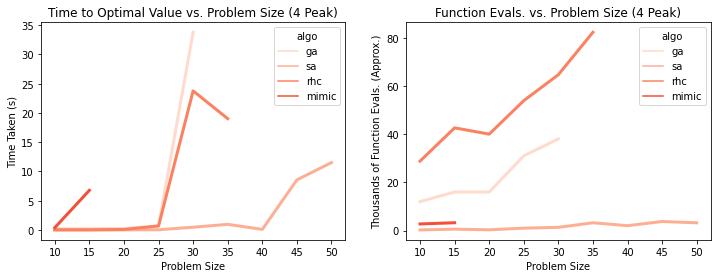

In [211]:
f, ax = plt.subplots(1,2, figsize=(12,4))
sns.set_palette("Reds")
sns.lineplot(x = 'size', y='time', hue='algo', data=pd.DataFrame(concatenated), ax=ax[0], linewidth = 3)
ax[0].set_title("Time to Optimal Value vs. Problem Size (4 Peak)", fontsize=12)
ax[0].set(xlabel='Problem Size', ylabel='Time Taken (s)')

sns.lineplot(x = 'size', y='fn_evals', hue='algo', data=pd.DataFrame(concatenated), ax=ax[1], linewidth = 3)
ax[1].set_title("Function Evals. vs. Problem Size (4 Peak)", fontsize=12)
ax[1].set(xlabel='Problem Size', ylabel='Thousands of Function Evals. (Approx.)')